In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('reduced_data.csv', index_col=0)
data.head()

,DepTime,ArrTime,Origin,Dest
296865,2008-01-01 00:01:00,2008-01-01 02:28:00,MDW,BWI
296940,2008-01-01 00:01:00,2008-01-01 01:17:00,MDW,MCI
546769,2008-01-01 00:02:00,2008-01-01 08:36:00,PDX,JFK
346517,2008-01-01 00:02:00,2008-01-01 05:29:00,DEN,FLL
354001,2008-01-01 00:02:00,2008-01-01 00:57:00,ATL,CHS


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6858079 entries, 296865 to 6663085
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   DepTime  object
 1   ArrTime  object
 2   Origin   object
 3   Dest     object
dtypes: object(4)
memory usage: 261.6+ MB


# Построение симуляций распространения вируса

In [83]:
from random import random
def infection_spread(data, start_point, contagiousness):

    def get_key(dictionary, target_value):
        for key, value in dictionary.items():
            if value == target_value:
                return key

    def del_values(dictionary, target_value):
        for key in list(dictionary.keys()):
            if dictionary[key] == target_value:
                dictionary.pop(key)     
        
        
    infected_ports = {'2008-01-01 00:00:00': start_point}
    
    for flight in data.itertuples():
        if flight.Origin in infected_ports.values():
            is_carrier = True if random() <= contagiousness else False
            if is_carrier and (flight.Dest not in infected_ports.values()
                               or flight.ArrTime < get_key(infected_ports, flight.Dest)):                
                if flight.Dest in infected_ports.values():                
                    del_values(infected_ports, flight.Dest)
                infected_ports[flight.ArrTime] = flight.Dest

    return infected_ports

In [84]:
import json
for p in [0.01, 0.05, 0.1, 0.5]:
    results = dict()
    for i in range(10):
        results[i] = infection_spread(data, 'ABE', p)
        print('Расчет {} для заразности {} готов.'.format(i, p))
        print(results[i])
        with open(''.join(['results_', str(p), '.json']), 'w') as file:
            json.dump(results, file)

Расчет 0 для заразности 0.01 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-08 10:27:00': 'CLT', '2008-01-08 17:14:00': 'BWI', '2008-01-08 20:35:00': 'MKE', '2008-01-08 23:19:00': 'DCA', '2008-01-09 07:01:00': 'ORD', '2008-01-09 07:49:00': 'STL', '2008-01-09 10:24:00': 'JFK', '2008-01-09 09:48:00': 'BHM', '2008-01-09 11:00:00': 'EWR', '2008-01-09 14:59:00': 'MIA', '2008-01-09 13:50:00': 'RDU', '2008-01-09 14:24:00': 'JAC', '2008-01-09 15:17:00': 'DFW', '2008-01-09 16:27:00': 'SDF', '2008-01-09 20:10:00': 'LAS', '2008-01-09 18:45:00': 'LGA', '2008-01-09 21:16:00': 'SAN', '2008-01-09 23:32:00': 'MSY', '2008-01-09 21:01:00': 'ICT', '2008-01-09 21:31:00': 'COS', '2008-01-09 23:02:00': 'LEX', '2008-01-09 00:20:00': 'BUF', '2008-01-10 07:44:00': 'SFO', '2008-01-10 08:41:00': 'IAH', '2008-01-10 09:06:00': 'FLL', '2008-01-10 09:14:00': 'MEM', '2008-01-10 08:25:00': 'HOU', '2008-01-10 10:21:00': 'HRL', '2008-01-10 10:31:00': 'ATL', '2008-01-10 12:16:00': 'OGG', '2008-01-10 09:57:00': 'TPA', '20

Расчет 1 для заразности 0.01 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-02 15:54:00': 'ORD', '2008-01-02 16:52:00': 'MSP', '2008-01-02 17:59:00': 'IND', '2008-01-02 18:22:00': 'GRB', '2008-01-02 19:47:00': 'MCO', '2008-01-02 21:02:00': 'CLT', '2008-01-02 21:49:00': 'SEA', '2008-01-02 21:23:00': 'PHL', '2008-01-02 19:57:00': 'SAN', '2008-01-02 21:24:00': 'MDT', '2008-01-02 21:45:00': 'XNA', '2008-01-02 21:40:00': 'ILM', '2008-01-02 22:32:00': 'MCI', '2008-01-02 00:15:00': 'DFW', '2008-01-02 00:05:00': 'OKC', '2008-01-03 08:52:00': 'ATL', '2008-01-03 08:39:00': 'SJC', '2008-01-03 08:19:00': 'MIA', '2008-01-03 10:13:00': 'SFO', '2008-01-03 08:54:00': 'SHV', '2008-01-03 10:45:00': 'MKE', '2008-01-03 10:03:00': 'BWI', '2008-01-03 10:17:00': 'MHT', '2008-01-03 10:52:00': 'BIS', '2008-01-03 11:32:00': 'FAR', '2008-01-03 11:07:00': 'MLI', '2008-01-03 13:59:00': 'JAX', '2008-01-03 14:26:00': 'DTW', '2008-01-03 12:44:00': 'HOU', '2008-01-03 12:54:00': 'BIL', '2008-01-03 12:29:00': 'DEN', '20

Расчет 2 для заразности 0.01 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 09:17:00': 'ORD', '2008-01-01 16:26:00': 'DAY', '2008-01-01 17:22:00': 'PIT', '2008-01-01 17:33:00': 'ATL', '2008-01-01 18:16:00': 'PHX', '2008-01-01 19:44:00': 'DCA', '2008-01-01 20:57:00': 'LGA', '2008-01-01 18:46:00': 'BOS', '2008-01-01 21:59:00': 'PBI', '2008-01-01 20:10:00': 'BWI', '2008-01-01 19:23:00': 'MSN', '2008-01-01 19:50:00': 'SNA', '2008-01-01 22:32:00': 'SLC', '2008-01-01 21:49:00': 'SMF', '2008-01-01 22:38:00': 'OMA', '2008-01-01 22:42:00': 'MKE', '2008-01-01 23:05:00': 'LEX', '2008-01-02 08:08:00': 'CLE', '2008-01-02 09:38:00': 'SEA', '2008-01-02 09:36:00': 'PHL', '2008-01-02 08:26:00': 'MHT', '2008-01-02 08:42:00': 'CVG', '2008-01-02 09:42:00': 'GRR', '2008-01-02 11:57:00': 'AUS', '2008-01-02 11:32:00': 'IAH', '2008-01-02 09:43:00': 'MGM', '2008-01-02 10:18:00': 'MSY', '2008-01-02 11:39:00': 'MSP', '2008-01-02 12:27:00': 'TVC', '2008-01-02 13:10:00': 'MOB', '2008-01-02 13:21:00': 'MEM', '20

Расчет 3 для заразности 0.01 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-13 14:41:00': 'ATL', '2008-01-13 13:54:00': 'TPA', '2008-01-13 15:00:00': 'EWR', '2008-01-13 16:23:00': 'DEN', '2008-01-13 18:56:00': 'MKE', '2008-01-13 17:06:00': 'ABY', '2008-01-13 19:08:00': 'BOS', '2008-01-13 22:27:00': 'BWI', '2008-01-13 20:32:00': 'STL', '2008-01-13 20:46:00': 'ALB', '2008-01-13 20:51:00': 'TLH', '2008-01-13 21:17:00': 'LAS', '2008-01-13 21:10:00': 'ABQ', '2008-01-13 23:45:00': 'DFW', '2008-01-13 23:59:00': 'SJC', '2008-01-14 08:39:00': 'DAL', '2008-01-14 10:25:00': 'IAH', '2008-01-14 10:04:00': 'DTW', '2008-01-14 09:57:00': 'DCA', '2008-01-14 12:20:00': 'MCO', '2008-01-14 10:42:00': 'BHM', '2008-01-14 11:11:00': 'RNO', '2008-01-14 10:46:00': 'MIA', '2008-01-14 13:36:00': 'ORF', '2008-01-14 12:53:00': 'EUG', '2008-01-14 12:39:00': 'SFO', '2008-01-14 11:32:00': 'MOB', '2008-01-14 12:43:00': 'SMF', '2008-01-14 13:35:00': 'ORD', '2008-01-14 13:33:00': 'BUF', '2008-01-14 15:03:00': 'LGA', '20

Расчет 4 для заразности 0.01 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-06 20:05:00': 'ATL', '2008-01-06 18:58:00': 'BHM', '2008-01-06 21:31:00': 'PDX', '2008-01-06 20:58:00': 'ORD', '2008-01-06 22:16:00': 'TPA', '2008-01-06 21:55:00': 'LIT', '2008-01-06 21:49:00': 'MLU', '2008-01-06 23:32:00': 'FAR', '2008-01-07 08:37:00': 'CLT', '2008-01-07 08:49:00': 'IAD', '2008-01-07 09:09:00': 'HOU', '2008-01-07 11:11:00': 'TVC', '2008-01-07 13:02:00': 'EWR', '2008-01-07 11:02:00': 'SAV', '2008-01-07 12:10:00': 'ASE', '2008-01-07 13:48:00': 'LGA', '2008-01-07 13:24:00': 'MKE', '2008-01-07 13:21:00': 'GSP', '2008-01-07 14:39:00': 'XNA', '2008-01-07 14:35:00': 'DAB', '2008-01-07 14:32:00': 'MLI', '2008-01-07 17:26:00': 'DFW', '2008-01-07 17:00:00': 'MYR', '2008-01-07 18:42:00': 'TYS', '2008-01-07 21:17:00': 'MDT', '2008-01-07 16:15:00': 'DHN', '2008-01-07 18:03:00': 'MCO', '2008-01-07 17:55:00': 'SPI', '2008-01-07 18:25:00': 'IAH', '2008-01-07 20:24:00': 'ALB', '2008-01-07 19:40:00': 'DCA', '20

Расчет 5 для заразности 0.01 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-13 15:18:00': 'CLE', '2008-01-15 08:08:00': 'ATL', '2008-01-15 11:27:00': 'MSP', '2008-01-15 11:00:00': 'CAE', '2008-01-15 11:54:00': 'IND', '2008-01-15 13:07:00': 'COS', '2008-01-15 16:39:00': 'DTW', '2008-01-15 15:35:00': 'LGA', '2008-01-15 16:02:00': 'PIA', '2008-01-15 17:12:00': 'IAD', '2008-01-15 18:32:00': 'SLC', '2008-01-15 20:02:00': 'ORD', '2008-01-15 20:19:00': 'LAS', '2008-01-15 21:51:00': 'GSO', '2008-01-15 21:25:00': 'CMI', '2008-01-15 22:51:00': 'IDA', '2008-01-15 22:30:00': 'MSN', '2008-01-15 22:44:00': 'MDT', '2008-01-15 23:54:00': 'PBI', '2008-01-15 23:36:00': 'CHS', '2008-01-16 08:18:00': 'CVG', '2008-01-16 09:10:00': 'DEN', '2008-01-16 08:46:00': 'BUR', '2008-01-16 09:01:00': 'MCI', '2008-01-16 08:53:00': 'ATW', '2008-01-16 10:41:00': 'FLL', '2008-01-16 10:14:00': 'GSP', '2008-01-16 12:20:00': 'FSD', '2008-01-16 11:20:00': 'BIL', '2008-01-16 13:25:00': 'SDF', '2008-01-16 12:22:00': 'CLT', '20

Расчет 6 для заразности 0.01 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-18 10:10:00': 'CVG', '2008-01-18 09:41:00': 'MEM', '2008-01-18 11:00:00': 'MGM', '2008-01-18 15:35:00': 'VPS', '2008-01-18 15:51:00': 'SHV', '2008-01-18 17:00:00': 'BOS', '2008-01-18 19:08:00': 'BWI', '2008-01-18 20:58:00': 'CAK', '2008-01-18 20:33:00': 'BHM', '2008-01-18 21:25:00': 'CMH', '2008-01-18 23:33:00': 'TPA', '2008-01-19 07:56:00': 'ATL', '2008-01-19 09:52:00': 'IAH', '2008-01-19 08:45:00': 'DFW', '2008-01-19 11:46:00': 'BUF', '2008-01-19 12:19:00': 'FLL', '2008-01-19 12:50:00': 'PNS', '2008-01-19 14:12:00': 'PHX', '2008-01-19 13:07:00': 'ACT', '2008-01-19 16:44:00': 'IND', '2008-01-19 15:38:00': 'SAT', '2008-01-19 16:10:00': 'LAX', '2008-01-19 16:55:00': 'SJC', '2008-01-19 17:39:00': 'DSM', '2008-01-19 17:24:00': 'OAK', '2008-01-19 19:56:00': 'DTW', '2008-01-19 19:33:00': 'RDU', '2008-01-19 21:48:00': 'LGA', '2008-01-19 20:15:00': 'SFO', '2008-01-19 21:21:00': 'ELP', '2008-01-19 22:39:00': 'GSO', '20

Расчет 7 для заразности 0.01 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-02 08:01:00': 'CVG', '2008-01-02 11:19:00': 'SLC', '2008-01-02 16:28:00': 'PHL', '2008-01-02 13:28:00': 'CHS', '2008-01-02 17:41:00': 'ATL', '2008-01-02 15:20:00': 'DTW', '2008-01-02 15:45:00': 'JFK', '2008-01-02 15:35:00': 'AVL', '2008-01-02 15:52:00': 'IND', '2008-01-02 15:37:00': 'BUR', '2008-01-02 15:43:00': 'LIT', '2008-01-02 16:40:00': 'ICT', '2008-01-02 17:13:00': 'FWA', '2008-01-02 17:31:00': 'LAX', '2008-01-02 16:53:00': 'OMA', '2008-01-02 19:00:00': 'LGB', '2008-01-02 22:42:00': 'CLT', '2008-01-02 20:04:00': 'PHX', '2008-01-02 20:41:00': 'LEX', '2008-01-02 21:35:00': 'CMH', '2008-01-02 22:37:00': 'ASE', '2008-01-02 22:48:00': 'ROC', '2008-01-02 23:17:00': 'MKE', '2008-01-02 00:38:00': 'SEA', '2008-01-02 00:05:00': 'DCA', '2008-01-02 22:52:00': 'MOB', '2008-01-02 06:59:00': 'EWR', '2008-01-02 01:29:00': 'BOS', '2008-01-03 07:46:00': 'CLE', '2008-01-03 08:29:00': 'MSY', '2008-01-03 10:29:00': 'RSW', '20

Расчет 8 для заразности 0.01 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-03 18:38:00': 'ORD', '2008-01-03 21:55:00': 'COS', '2008-01-04 08:55:00': 'BWI', '2008-01-04 08:10:00': 'MEM', '2008-01-04 10:59:00': 'SAN', '2008-01-04 11:39:00': 'EWR', '2008-01-04 12:50:00': 'STL', '2008-01-04 14:08:00': 'IND', '2008-01-04 14:00:00': 'IAD', '2008-01-04 15:11:00': 'ATL', '2008-01-04 15:59:00': 'MLI', '2008-01-04 18:11:00': 'IAH', '2008-01-04 15:28:00': 'JAN', '2008-01-04 16:07:00': 'MGM', '2008-01-04 17:26:00': 'MCO', '2008-01-04 17:39:00': 'BHM', '2008-01-04 18:29:00': 'DAY', '2008-01-04 19:09:00': 'MSP', '2008-01-04 20:21:00': 'FNT', '2008-01-04 20:08:00': 'DFW', '2008-01-04 21:09:00': 'AZO', '2008-01-04 22:25:00': 'BOS', '2008-01-04 19:41:00': 'SNA', '2008-01-04 22:41:00': 'ALB', '2008-01-04 22:24:00': 'PHL', '2008-01-04 21:29:00': 'TUL', '2008-01-04 00:04:00': 'OAK', '2008-01-04 23:46:00': 'BNA', '2008-01-04 00:17:00': 'PHX', '2008-01-04 00:30:00': 'SMF', '2008-01-05 09:18:00': 'BDL', '20

Расчет 9 для заразности 0.01 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 15:17:00': 'DTW', '2008-01-02 15:51:00': 'CLT', '2008-01-02 18:35:00': 'IND', '2008-01-02 21:52:00': 'MHT', '2008-01-02 00:05:00': 'BWI', '2008-01-03 10:43:00': 'BOS', '2008-01-03 10:34:00': 'LGA', '2008-01-03 11:25:00': 'EWR', '2008-01-03 12:07:00': 'ATL', '2008-01-03 12:35:00': 'DFW', '2008-01-03 13:37:00': 'DEN', '2008-01-03 13:00:00': 'ROC', '2008-01-03 13:44:00': 'MSY', '2008-01-03 13:47:00': 'SEA', '2008-01-03 13:58:00': 'PHX', '2008-01-03 13:45:00': 'CAE', '2008-01-03 14:57:00': 'CID', '2008-01-03 14:43:00': 'HSV', '2008-01-03 14:37:00': 'ORD', '2008-01-03 16:02:00': 'MDT', '2008-01-03 14:46:00': 'CHA', '2008-01-03 19:59:00': 'MDW', '2008-01-03 15:11:00': 'PIA', '2008-01-03 17:12:00': 'CLE', '2008-01-03 17:34:00': 'RNO', '2008-01-03 18:38:00': 'MEM', '2008-01-03 18:30:00': 'SAT', '2008-01-03 18:47:00': 'IAD', '2008-01-03 16:48:00': 'SMF', '2008-01-03 17:28:00': 'DSM', '2008-01-03 18:55:00': 'JAX', '20

Расчет 0 для заразности 0.05 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 15:59:00': 'RIC', '2008-01-01 15:49:00': 'CLE', '2008-01-01 17:31:00': 'LGA', '2008-01-01 17:13:00': 'LAN', '2008-01-01 18:26:00': 'BWI', '2008-01-01 17:51:00': 'PVD', '2008-01-01 19:08:00': 'DEN', '2008-01-01 18:42:00': 'CMH', '2008-01-01 17:45:00': 'MEM', '2008-01-01 18:40:00': 'BDL', '2008-01-01 20:08:00': 'MSP', '2008-01-01 19:15:00': 'CLT', '2008-01-01 20:02:00': 'OMA', '2008-01-01 23:11:00': 'SJU', '2008-01-01 00:11:00': 'MIA', '2008-01-01 00:08:00': 'BOS', '2008-01-01 21:12:00': 'MHT', '2008-01-01 20:53:00': 'LBB', '2008-01-01 20:16:00': 'SAN', '2008-01-01 21:35:00': 'IND', '2008-01-01 20:51:00': 'SCE', '2008-01-01 20:52:00': 'CAK', '2008-01-01 22:48:00': 'RDU', '2008-01-01 20:55:00': 'IAD', '2008-01-01 00:22:00': 'PHL', '2008-01-01 20:24:00': 'BUF', '2008-01-01 01:19:00': 'ORD', '2008-01-01 21:11:00': 'GPT', '2008-01-01 23:25:00': 'BHM', '2008-01-01 21:48:00': 'GSO', '2008-01-01 21:00:00': 'BUR', '20

Расчет 1 для заразности 0.05 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 20:39:00': 'PHX', '2008-01-01 18:35:00': 'LAX', '2008-01-01 20:32:00': 'BTV', '2008-01-01 20:05:00': 'OAK', '2008-01-01 19:50:00': 'SAV', '2008-01-01 21:01:00': 'PVD', '2008-01-01 00:49:00': 'DTW', '2008-01-01 19:24:00': 'SAN', '2008-01-01 22:12:00': 'ABQ', '2008-01-01 21:00:00': 'BWI', '2008-01-01 22:15:00': 'OKC', '2008-01-01 21:51:00': 'MCI', '2008-01-01 21:03:00': 'OXR', '2008-01-01 20:35:00': 'VPS', '2008-01-01 20:16:00': 'HSV', '2008-01-01 23:01:00': 'SAT', '2008-01-01 21:28:00': 'SBA', '2008-01-01 22:24:00': 'CLE', '2008-01-01 01:42:00': 'DFW', '2008-01-01 22:14:00': 'MHT', '2008-01-01 22:23:00': 'SNA', '2008-01-01 22:56:00': 'ORD', '2008-01-01 22:36:00': 'ONT', '2008-01-01 22:50:00': 'TUL', '2008-01-01 05:48:00': 'JFK', '2008-01-01 04:36:00': 'ATL', '2008-01-01 22:33:00': 'CMI', '2008-01-01 23:39:00': 'LGA', '2008-01-01 00:38:00': 'SEA', '2008-01-01 23:12:00': 'BHM', '2008-01-01 00:03:00': 'SJC', '20

Расчет 2 для заразности 0.05 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-02 08:48:00': 'ORD', '2008-01-02 10:07:00': 'ICT', '2008-01-02 11:38:00': 'DCA', '2008-01-02 13:11:00': 'HNL', '2008-01-02 11:20:00': 'FAR', '2008-01-02 13:54:00': 'OMA', '2008-01-02 12:07:00': 'BOI', '2008-01-02 12:03:00': 'PNS', '2008-01-02 10:50:00': 'RDU', '2008-01-02 12:20:00': 'IAH', '2008-01-02 10:47:00': 'DAL', '2008-01-02 13:06:00': 'TPA', '2008-01-02 12:21:00': 'GPT', '2008-01-02 11:43:00': 'ONT', '2008-01-02 13:02:00': 'SMF', '2008-01-02 13:25:00': 'JAN', '2008-01-02 15:19:00': 'MIA', '2008-01-02 12:55:00': 'GNV', '2008-01-02 12:45:00': 'MSN', '2008-01-02 15:00:00': 'TYS', '2008-01-02 13:18:00': 'HOU', '2008-01-02 13:09:00': 'PVD', '2008-01-02 13:14:00': 'LNK', '2008-01-02 11:58:00': 'BHM', '2008-01-02 17:01:00': 'MCI', '2008-01-02 16:17:00': 'RIC', '2008-01-02 14:19:00': 'OAK', '2008-01-02 14:07:00': 'CVG', '2008-01-02 13:44:00': 'MSY', '2008-01-02 13:51:00': 'LFT', '2008-01-02 16:16:00': 'PWM', '20

Расчет 3 для заразности 0.05 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-03 19:33:00': 'CLE', '2008-01-03 20:51:00': 'ROC', '2008-01-03 21:19:00': 'IAD', '2008-01-03 22:13:00': 'DAY', '2008-01-03 23:51:00': 'MDW', '2008-01-04 07:28:00': 'DEN', '2008-01-04 07:09:00': 'DAL', '2008-01-04 11:31:00': 'MSP', '2008-01-04 07:58:00': 'HOU', '2008-01-04 08:03:00': 'LAS', '2008-01-04 09:12:00': 'TUL', '2008-01-04 09:28:00': 'SNA', '2008-01-04 10:30:00': 'PNS', '2008-01-04 12:51:00': 'MEM', '2008-01-04 10:41:00': 'SAN', '2008-01-04 09:57:00': 'SEA', '2008-01-04 10:33:00': 'RIC', '2008-01-04 11:52:00': 'LGB', '2008-01-04 09:27:00': 'AUS', '2008-01-04 10:25:00': 'SMF', '2008-01-04 10:03:00': 'MFE', '2008-01-04 10:58:00': 'OMA', '2008-01-04 10:39:00': 'DCA', '2008-01-04 10:35:00': 'GSP', '2008-01-04 11:12:00': 'MSY', '2008-01-04 11:01:00': 'CAK', '2008-01-04 10:12:00': 'ORD', '2008-01-04 11:13:00': 'SBN', '2008-01-04 11:59:00': 'BUR', '2008-01-04 10:55:00': 'OAK', '2008-01-04 11:14:00': 'BZN', '20

Расчет 4 для заразности 0.05 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'DTW', '2008-01-01 13:57:00': 'FLL', '2008-01-01 12:28:00': 'CLT', '2008-01-01 11:49:00': 'JAX', '2008-01-01 13:41:00': 'PBI', '2008-01-01 13:16:00': 'IAD', '2008-01-01 13:54:00': 'RSW', '2008-01-01 13:09:00': 'MSP', '2008-01-01 14:28:00': 'SAN', '2008-01-01 15:54:00': 'BDL', '2008-01-01 15:06:00': 'BNA', '2008-01-01 15:47:00': 'HOU', '2008-01-01 15:16:00': 'XNA', '2008-01-01 15:01:00': 'SMF', '2008-01-01 14:29:00': 'SBA', '2008-01-01 17:16:00': 'BWI', '2008-01-01 16:14:00': 'SLC', '2008-01-01 15:02:00': 'DCA', '2008-01-01 14:56:00': 'DAL', '2008-01-01 15:42:00': 'MCI', '2008-01-01 15:22:00': 'MSN', '2008-01-01 15:29:00': 'LGA', '2008-01-01 16:25:00': 'LNK', '2008-01-01 16:31:00': 'MEM', '2008-01-01 16:12:00': 'PNS', '2008-01-01 16:09:00': 'PIH', '2008-01-01 18:47:00': 'OGG', '2008-01-01 16:30:00': 'RDU', '2008-01-01 16:51:00': 'SUN', '2008-01-01 16:42:00': 'ATL', '2008-01-01 17:04:00': 'PHF', '20

Расчет 5 для заразности 0.05 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-02 07:28:00': 'MEM', '2008-01-02 10:41:00': 'RSW', '2008-01-02 10:19:00': 'CVG', '2008-01-02 10:08:00': 'PNS', '2008-01-02 09:15:00': 'CLT', '2008-01-02 10:04:00': 'MSP', '2008-01-02 10:27:00': 'MCI', '2008-01-02 10:57:00': 'CHS', '2008-01-02 12:08:00': 'PIT', '2008-01-02 10:37:00': 'RIC', '2008-01-02 10:17:00': 'BOS', '2008-01-02 10:51:00': 'CHO', '2008-01-02 09:49:00': 'OXR', '2008-01-02 10:28:00': 'SDF', '2008-01-02 12:59:00': 'SEA', '2008-01-02 10:58:00': 'AUS', '2008-01-02 10:48:00': 'ELP', '2008-01-02 11:03:00': 'ROC', '2008-01-02 11:09:00': 'SMF', '2008-01-02 11:05:00': 'DEN', '2008-01-02 10:39:00': 'MKE', '2008-01-02 10:46:00': 'VPS', '2008-01-02 11:31:00': 'SJC', '2008-01-02 10:49:00': 'PFN', '2008-01-02 11:02:00': 'ONT', '2008-01-02 12:05:00': 'FLL', '2008-01-02 14:30:00': 'GRR', '2008-01-02 12:40:00': 'TUL', '2008-01-02 12:52:00': 'SGF', '2008-01-02 11:51:00': 'STL', '2008-01-02 11:24:00': 'JAC', '20

Расчет 6 для заразности 0.05 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 19:35:00': 'CLE', '2008-01-01 21:03:00': 'MHT', '2008-01-02 08:45:00': 'ATL', '2008-01-02 09:09:00': 'DFW', '2008-01-02 09:23:00': 'SEA', '2008-01-02 09:53:00': 'MEM', '2008-01-02 09:41:00': 'CPR', '2008-01-02 10:26:00': 'LAS', '2008-01-02 10:05:00': 'DEN', '2008-01-02 10:08:00': 'GNV', '2008-01-02 08:48:00': 'SAN', '2008-01-02 11:09:00': 'SFO', '2008-01-02 10:06:00': 'MSY', '2008-01-02 09:59:00': 'ABQ', '2008-01-02 09:49:00': 'MRY', '2008-01-02 12:01:00': 'RNO', '2008-01-02 10:40:00': 'OKC', '2008-01-02 12:13:00': 'CVG', '2008-01-02 10:17:00': 'BHM', '2008-01-02 15:02:00': 'STT', '2008-01-02 10:53:00': 'RSW', '2008-01-02 12:30:00': 'CMI', '2008-01-02 13:23:00': 'SDF', '2008-01-02 12:10:00': 'TUS', '2008-01-02 16:11:00': 'TPA', '2008-01-02 12:05:00': 'IAD', '2008-01-02 11:59:00': 'RAP', '2008-01-02 11:56:00': 'MFE', '2008-01-02 15:58:00': 'SAT', '2008-01-02 13:25:00': 'GSP', '2008-01-02 12:02:00': 'BUR', '20

Расчет 7 для заразности 0.05 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 15:17:00': 'DTW', '2008-01-01 15:49:00': 'CLE', '2008-01-01 18:43:00': 'MIA', '2008-01-01 17:15:00': 'BWI', '2008-01-01 18:00:00': 'MEM', '2008-01-01 17:36:00': 'ROC', '2008-01-01 18:58:00': 'SDF', '2008-01-01 18:36:00': 'RDU', '2008-01-01 19:09:00': 'DAL', '2008-01-01 18:39:00': 'BNA', '2008-01-01 20:23:00': 'MHT', '2008-01-01 20:20:00': 'SYR', '2008-01-01 19:04:00': 'OKC', '2008-01-01 20:56:00': 'DFW', '2008-01-01 20:35:00': 'CLT', '2008-01-01 20:49:00': 'IAD', '2008-01-01 20:51:00': 'DAY', '2008-01-01 20:18:00': 'SAT', '2008-01-01 19:58:00': 'ONT', '2008-01-01 21:22:00': 'IND', '2008-01-01 20:39:00': 'CMH', '2008-01-01 20:31:00': 'MGM', '2008-01-01 20:10:00': 'ELP', '2008-01-01 19:10:00': 'MDW', '2008-01-01 20:52:00': 'DCA', '2008-01-01 20:04:00': 'TUL', '2008-01-01 21:43:00': 'JFK', '2008-01-01 20:46:00': 'LFT', '2008-01-01 22:34:00': 'OAK', '2008-01-01 21:07:00': 'MKE', '2008-01-01 22:27:00': 'HPN', '20

Расчет 8 для заразности 0.05 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-03 15:28:00': 'CLE', '2008-01-03 20:26:00': 'PHX', '2008-01-03 19:49:00': 'LAS', '2008-01-03 23:24:00': 'STL', '2008-01-03 23:03:00': 'SAT', '2008-01-03 23:52:00': 'MSP', '2008-01-03 21:17:00': 'ONT', '2008-01-03 22:59:00': 'ABQ', '2008-01-03 23:16:00': 'IDA', '2008-01-03 22:33:00': 'SJC', '2008-01-03 22:48:00': 'ELP', '2008-01-03 23:25:00': 'RNO', '2008-01-03 23:58:00': 'TUS', '2008-01-03 01:00:00': 'BFL', '2008-01-03 06:48:00': 'ATL', '2008-01-04 02:15:00': 'SFO', '2008-01-04 07:37:00': 'DTW', '2008-01-04 07:47:00': 'MEM', '2008-01-04 08:48:00': 'TYS', '2008-01-04 07:38:00': 'DEN', '2008-01-04 07:58:00': 'SLC', '2008-01-04 07:40:00': 'OAK', '2008-01-04 08:01:00': 'SBA', '2008-01-04 10:01:00': 'PDX', '2008-01-04 08:24:00': 'SAN', '2008-01-04 11:05:00': 'CHS', '2008-01-04 08:39:00': 'DAL', '2008-01-04 09:13:00': 'CAK', '2008-01-04 09:27:00': 'PBI', '2008-01-04 09:41:00': 'XNA', '2008-01-04 09:09:00': 'SUN', '20

Расчет 9 для заразности 0.05 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 21:28:00': 'ORD', '2008-01-01 01:12:00': 'SAV', '2008-01-01 22:49:00': 'MKE', '2008-01-01 00:29:00': 'OKC', '2008-01-01 01:01:00': 'DTW', '2008-01-01 01:14:00': 'LAX', '2008-01-01 00:18:00': 'MLI', '2008-01-02 02:05:00': 'SBN', '2008-01-02 07:49:00': 'BOS', '2008-01-02 08:17:00': 'RDU', '2008-01-02 09:21:00': 'DFW', '2008-01-02 08:24:00': 'MRY', '2008-01-02 08:50:00': 'EVV', '2008-01-02 09:57:00': 'DEN', '2008-01-02 08:29:00': 'LAS', '2008-01-02 08:18:00': 'SAN', '2008-01-02 10:23:00': 'SEA', '2008-01-02 08:09:00': 'SBA', '2008-01-02 08:37:00': 'IAH', '2008-01-02 09:00:00': 'SJC', '2008-01-02 10:09:00': 'DSM', '2008-01-02 10:46:00': 'SLC', '2008-01-02 09:07:00': 'DAL', '2008-01-02 09:10:00': 'PDX', '2008-01-02 09:26:00': 'HDN', '2008-01-02 10:00:00': 'BUR', '2008-01-02 09:06:00': 'ROA', '2008-01-02 09:35:00': 'DRO', '2008-01-02 10:36:00': 'COS', '2008-01-02 09:18:00': 'AUS', '2008-01-02 09:41:00': 'BOI', '20

Расчет 0 для заразности 0.1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 15:17:00': 'DTW', '2008-01-01 14:51:00': 'PIT', '2008-01-01 16:29:00': 'MDW', '2008-01-01 16:40:00': 'CLT', '2008-01-01 15:22:00': 'BDL', '2008-01-01 16:07:00': 'ORD', '2008-01-01 15:59:00': 'LGB', '2008-01-01 15:47:00': 'LIT', '2008-01-01 15:36:00': 'IAD', '2008-01-01 16:00:00': 'TUL', '2008-01-01 15:02:00': 'GPT', '2008-01-01 16:14:00': 'SRQ', '2008-01-01 16:26:00': 'ACT', '2008-01-01 17:34:00': 'SAN', '2008-01-01 15:15:00': 'VPS', '2008-01-01 18:08:00': 'ABQ', '2008-01-01 16:38:00': 'DAB', '2008-01-01 16:56:00': 'CSG', '2008-01-01 17:25:00': 'FAR', '2008-01-01 16:45:00': 'JAN', '2008-01-01 16:46:00': 'MSP', '2008-01-01 18:18:00': 'GSP', '2008-01-01 17:20:00': 'OAK', '2008-01-01 17:05:00': 'DAL', '2008-01-01 18:45:00': 'AUS', '2008-01-01 17:58:00': 'LEX', '2008-01-01 17:36:00': 'HSV', '2008-01-01 17:08:00': 'OKC', '2008-01-01 17:50:00': 'PNS', '2008-01-01 16:54:00': 'STL', '2008-01-01 16:57:00': 'CLD', '200

Расчет 1 для заразности 0.1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 09:15:00': 'PHX', '2008-01-01 10:26:00': 'GPT', '2008-01-01 09:29:00': 'DEN', '2008-01-01 11:24:00': 'XNA', '2008-01-01 09:54:00': 'MDW', '2008-01-01 09:53:00': 'BTR', '2008-01-01 11:36:00': 'FWA', '2008-01-01 09:36:00': 'GRK', '2008-01-01 09:43:00': 'SFO', '2008-01-01 12:16:00': 'BOS', '2008-01-01 10:29:00': 'PSP', '2008-01-01 10:52:00': 'PDX', '2008-01-01 09:47:00': 'SAN', '2008-01-01 10:38:00': 'BIL', '2008-01-01 10:20:00': 'SJC', '2008-01-01 10:35:00': 'BTV', '2008-01-01 11:06:00': 'OKC', '2008-01-01 12:05:00': 'BOI', '2008-01-01 11:40:00': 'PVD', '2008-01-01 11:52:00': 'RNO', '2008-01-01 10:56:00': 'SBA', '2008-01-01 10:58:00': 'ONT', '2008-01-01 11:05:00': 'BWI', '2008-01-01 10:30:00': 'PNS', '2008-01-01 14:52:00': 'OMA', '2008-01-01 11:07:00': 'PIA', '2008-01-01 11:17:00': 'SHV', '2008-01-01 10:59:00': 'ATW', '2008-01-01 12:09:00': 'BUF', '2008-01-01 12:04:00': 'BHM', '2008-01-01 11:15:00': 'TLH', '200

Расчет 2 для заразности 0.1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-02 07:48:00': 'MSP', '2008-01-02 11:21:00': 'CAK', '2008-01-02 08:16:00': 'ABQ', '2008-01-02 11:08:00': 'PIT', '2008-01-02 07:56:00': 'BUR', '2008-01-02 09:58:00': 'PMD', '2008-01-02 08:46:00': 'OAK', '2008-01-02 08:55:00': 'SAT', '2008-01-02 08:24:00': 'MCI', '2008-01-02 10:31:00': 'BOI', '2008-01-02 09:00:00': 'DCA', '2008-01-02 10:43:00': 'OMA', '2008-01-02 09:56:00': 'MIA', '2008-01-02 10:25:00': 'TUS', '2008-01-02 10:33:00': 'FAT', '2008-01-02 10:36:00': 'CHA', '2008-01-02 10:19:00': 'CVG', '2008-01-02 08:42:00': 'SNA', '2008-01-02 09:52:00': 'PDX', '2008-01-02 09:36:00': 'HOU', '2008-01-02 12:05:00': 'JAX', '2008-01-02 09:23:00': 'CAE', '2008-01-02 08:20:00': 'HSV', '2008-01-02 10:01:00': 'LAS', '2008-01-02 09:48:00': 'SJC', '2008-01-02 10:32:00': 'TUL', '2008-01-02 09:57:00': 'MRY', '2008-01-02 11:33:00': 'SDF', '2008-01-02 10:16:00': 'GGG', '2008-01-02 10:40:00': 'MOT', '2008-01-02 10:35:00': 'BHM', '200

Расчет 3 для заразности 0.1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 15:49:00': 'CLE', '2008-01-01 18:07:00': 'DCA', '2008-01-01 18:41:00': 'MSY', '2008-01-01 20:17:00': 'IAD', '2008-01-01 18:13:00': 'ELP', '2008-01-01 22:23:00': 'SJU', '2008-01-01 18:51:00': 'AMA', '2008-01-01 18:09:00': 'BUR', '2008-01-01 19:41:00': 'SAT', '2008-01-01 19:10:00': 'CVG', '2008-01-01 19:27:00': 'MOB', '2008-01-01 18:15:00': 'LGB', '2008-01-01 19:51:00': 'ITO', '2008-01-01 19:55:00': 'BHM', '2008-01-01 19:49:00': 'RIC', '2008-01-01 20:08:00': 'MEM', '2008-01-01 00:17:00': 'RDU', '2008-01-01 20:03:00': 'IAH', '2008-01-01 21:07:00': 'AUS', '2008-01-01 20:05:00': 'RNO', '2008-01-01 21:12:00': 'ANC', '2008-01-01 20:15:00': 'OGG', '2008-01-01 19:45:00': 'SBP', '2008-01-01 22:39:00': 'MIA', '2008-01-01 21:39:00': 'ROC', '2008-01-01 20:53:00': 'LBB', '2008-01-01 21:19:00': 'TUL', '2008-01-01 21:03:00': 'MHT', '2008-01-01 20:58:00': 'ASE', '2008-01-01 20:51:00': 'SCE', '2008-01-01 21:28:00': 'SLC', '200

Расчет 4 для заразности 0.1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-03 07:59:00': 'CLE', '2008-01-03 10:12:00': 'PHX', '2008-01-03 08:40:00': 'RNO', '2008-01-03 08:01:00': 'ONT', '2008-01-03 10:26:00': 'SNA', '2008-01-03 09:43:00': 'LIH', '2008-01-03 10:33:00': 'RIC', '2008-01-03 09:37:00': 'LAS', '2008-01-03 10:35:00': 'BNA', '2008-01-03 10:10:00': 'DCA', '2008-01-03 10:16:00': 'MSY', '2008-01-03 11:03:00': 'CHS', '2008-01-03 10:44:00': 'CLT', '2008-01-03 09:30:00': 'MDW', '2008-01-03 09:54:00': 'KOA', '2008-01-03 10:07:00': 'ITO', '2008-01-03 10:20:00': 'CSG', '2008-01-03 10:34:00': 'MKE', '2008-01-03 10:52:00': 'VLD', '2008-01-03 11:53:00': 'BDL', '2008-01-03 10:38:00': 'JAN', '2008-01-03 11:33:00': 'IAD', '2008-01-03 10:14:00': 'ABY', '2008-01-03 10:47:00': 'SDF', '2008-01-03 11:10:00': 'DFW', '2008-01-03 11:12:00': 'BMI', '2008-01-03 11:17:00': 'HOU', '2008-01-03 12:42:00': 'PDX', '2008-01-03 12:47:00': 'PWM', '2008-01-03 13:25:00': 'FAR', '2008-01-03 11:32:00': 'SAN', '200

Расчет 5 для заразности 0.1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 18:51:00': 'CLT', '2008-01-01 20:17:00': 'PSP', '2008-01-01 20:38:00': 'RNO', '2008-01-01 19:38:00': 'PIA', '2008-01-01 21:30:00': 'ABQ', '2008-01-01 20:32:00': 'GSO', '2008-01-01 21:16:00': 'PHX', '2008-01-01 18:54:00': 'LAS', '2008-01-01 22:06:00': 'TUS', '2008-01-01 01:21:00': 'DTW', '2008-01-01 20:28:00': 'LEX', '2008-01-01 21:23:00': 'FLL', '2008-01-01 20:19:00': 'MLI', '2008-01-01 20:29:00': 'STL', '2008-01-01 00:02:00': 'OMA', '2008-01-01 22:34:00': 'PDX', '2008-01-01 21:31:00': 'SNA', '2008-01-01 02:04:00': 'IND', '2008-01-01 21:58:00': 'MCI', '2008-01-01 00:20:00': 'ORD', '2008-01-01 20:25:00': 'CID', '2008-01-01 20:43:00': 'PSC', '2008-01-01 22:15:00': 'XNA', '2008-01-01 20:16:00': 'SAN', '2008-01-01 21:35:00': 'RIC', '2008-01-01 20:56:00': 'SFO', '2008-01-01 21:43:00': 'SBA', '2008-01-01 21:39:00': 'ROC', '2008-01-01 22:04:00': 'AVP', '2008-01-01 21:45:00': 'DAL', '2008-01-01 22:05:00': 'DRO', '200

Расчет 6 для заразности 0.1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 19:28:00': 'GSP', '2008-01-01 18:44:00': 'BTV', '2008-01-01 20:06:00': 'AUS', '2008-01-01 18:14:00': 'COS', '2008-01-01 19:24:00': 'SLC', '2008-01-01 00:40:00': 'JFK', '2008-01-01 17:30:00': 'BHM', '2008-01-01 18:28:00': 'BIL', '2008-01-01 18:31:00': 'GRB', '2008-01-01 00:35:00': 'DTW', '2008-01-01 21:15:00': 'BFL', '2008-01-01 18:45:00': 'DAY', '2008-01-01 00:13:00': 'PIT', '2008-01-01 19:48:00': 'LGA', '2008-01-01 18:06:00': 'SBA', '2008-01-01 18:55:00': 'CPR', '2008-01-01 17:59:00': 'MKE', '2008-01-01 18:52:00': 'BWI', '2008-01-01 18:30:00': 'MYR', '2008-01-01 19:02:00': 'JAX', '2008-01-01 19:45:00': 'ROC', '2008-01-01 17:55:00': 'LAS', '2008-01-01 19:10:00': 'CVG', '2008-01-01 20:23:00': 'GGG', '2008-01-01 18:56:00': 'SNA', '2008-01-01 18:23:00': 'MEM', '2008-01-01 18:53:00': 'CAE', '2008-01-01 20:57:00': 'SEA', '2008-01-01 19:15:00': 'BUR', '2008-01-01 19:21:00': 'RIC', '2008-01-01 19:29:00': 'HDN', '200

Расчет 7 для заразности 0.1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-02 09:46:00': 'ELP', '2008-01-02 10:18:00': 'ABQ', '2008-01-02 11:41:00': 'XNA', '2008-01-02 11:18:00': 'TUS', '2008-01-02 11:05:00': 'ONT', '2008-01-02 12:04:00': 'SAN', '2008-01-02 11:54:00': 'PHL', '2008-01-02 11:06:00': 'JAX', '2008-01-02 10:46:00': 'FSD', '2008-01-02 11:52:00': 'MOB', '2008-01-02 13:35:00': 'SJU', '2008-01-02 10:41:00': 'GPT', '2008-01-02 11:19:00': 'STL', '2008-01-02 12:54:00': 'OKC', '2008-01-02 11:24:00': 'JAC', '2008-01-02 11:15:00': 'VLD', '2008-01-02 11:28:00': 'BOI', '2008-01-02 11:40:00': 'BWI', '2008-01-02 12:50:00': 'DAY', '2008-01-02 11:45:00': 'DSM', '2008-01-02 12:39:00': 'CEC', '2008-01-02 12:45:00': 'GJT', '2008-01-02 11:09:00': 'JAN', '2008-01-02 11:21:00': 'LAS', '2008-01-02 11:47:00': 'YKM', '2008-01-02 12:12:00': 'SFO', '2008-01-02 12:33:00': 'DEN', '2008-01-02 12:29:00': 'DRO', '2008-01-02 12:16:00': 'CLL', '2008-01-02 11:58:00': 'LGB', '2008-01-02 12:18:00': 'IPL', '200

Расчет 8 для заразности 0.1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 09:07:00': 'CVG', '2008-01-01 08:52:00': 'BNA', '2008-01-01 08:33:00': 'MSP', '2008-01-01 08:53:00': 'LGA', '2008-01-01 09:58:00': 'DCA', '2008-01-01 08:40:00': 'BUF', '2008-01-01 10:25:00': 'SAN', '2008-01-01 10:37:00': 'MSY', '2008-01-01 09:26:00': 'OXR', '2008-01-01 08:38:00': 'LAS', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:32:00': 'LFT', '2008-01-01 09:08:00': 'JAX', '2008-01-01 09:24:00': 'BUR', '2008-01-01 09:18:00': 'LIH', '2008-01-01 13:02:00': 'BIL', '2008-01-01 12:15:00': 'RIC', '2008-01-01 10:08:00': 'HOU', '2008-01-01 11:36:00': 'SLC', '2008-01-01 11:22:00': 'SAT', '2008-01-01 12:03:00': 'SRQ', '2008-01-01 09:23:00': 'ONT', '2008-01-01 10:19:00': 'CLT', '2008-01-01 11:13:00': 'TUS', '2008-01-01 10:00:00': 'BHM', '2008-01-01 10:40:00': 'ELP', '2008-01-01 11:20:00': 'FSD', '2008-01-01 11:38:00': 'DSM', '2008-01-01 11:14:00': 'LAW', '2008-01-01 12:49:00': 'MEM', '2008-01-01 14:52:00': 'OMA', '200

Расчет 9 для заразности 0.1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-02 07:56:00': 'MSN', '2008-01-02 09:56:00': 'ACT', '2008-01-02 09:40:00': 'TVC', '2008-01-02 11:36:00': 'CAE', '2008-01-02 10:16:00': 'PDX', '2008-01-02 11:10:00': 'HNL', '2008-01-02 09:53:00': 'TUL', '2008-01-02 10:19:00': 'PHF', '2008-01-02 10:39:00': 'AEX', '2008-01-02 11:24:00': 'MCI', '2008-01-02 13:59:00': 'LIT', '2008-01-02 11:42:00': 'ASE', '2008-01-02 11:03:00': 'TRI', '2008-01-02 10:45:00': 'YUM', '2008-01-02 10:58:00': 'OKC', '2008-01-02 10:46:00': 'MAF', '2008-01-02 11:08:00': 'PIA', '2008-01-02 10:22:00': 'OGG', '2008-01-02 11:46:00': 'VPS', '2008-01-02 11:25:00': 'RNO', '2008-01-02 15:14:00': 'SJU', '2008-01-02 10:56:00': 'OMA', '2008-01-02 10:36:00': 'CHA', '2008-01-02 11:37:00': 'PIT', '2008-01-02 12:55:00': 'CID', '2008-01-02 11:02:00': 'LIH', '2008-01-02 11:49:00': 'PNS', '2008-01-02 11:01:00': 'AUS', '2008-01-02 11:23:00': 'RAP', '2008-01-02 13:03:00': 'XNA', '2008-01-02 11:18:00': 'FAT', '200

Расчет 0 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:22:00': 'CID', '2008-01-01 08:55:00': 'RDM', '2008-01-01 08:49:00': 'SNA', '2008-01-01 10:41:00': 'SUN', '2008-01-01 08:37:00': 'RNO', '2008-01-01 10:10:00': 'GPT', '2008-01-01 09:01:00': 'LBB', '2008-01-01 09:14:00': 'GRB', '2008-01-01 08:51:00': 'MSN', '2008-01-01 08:56:00': 'GEG', '2008-01-01 10:21:00': 'HOU', '2008-01-01 09:24:00': 'BUR', '2008-01-01 09:00:00': 'BDL', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:05:00': 'ACT', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:13:00': 'CHS', '2008-01-01 08:32:00': 'ONT', '2008-01-01 10:16:00': 'TXK', '2008-01-01 11:21:00': 'HSV', '2008-01-01 11:11:00': 'MOB', '2008-01-01 10:23:00': 'COS', '2008-01-01 09:34:00': 'DAL', '2008-01-01 11:33:00': 'AGS', '2008-01-01 10:00:00': 'PDX', '2008-01-01 09:18:00': 'LIH', '2008-01-01 09:54:00': 'SMF', '2008-01-01 09:38:00': 'EGE', '2008-01-01 10:05:00': 'OGG', '2008-01-01 12:15:00': 'FSD', '2008-01-01 10:06:00': 'PMD', '200

Расчет 1 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:20:00': 'HSV', '2008-01-01 09:33:00': 'JAN', '2008-01-01 08:21:00': 'LIT', '2008-01-01 09:19:00': 'HNL', '2008-01-01 08:49:00': 'SNA', '2008-01-01 07:57:00': 'ONT', '2008-01-01 09:21:00': 'PDX', '2008-01-01 09:01:00': 'ASE', '2008-01-01 08:18:00': 'PHX', '2008-01-01 08:37:00': 'BHM', '2008-01-01 10:17:00': 'LBB', '2008-01-01 08:24:00': 'BFL', '2008-01-01 08:26:00': 'LGB', '2008-01-01 08:55:00': 'RDM', '2008-01-01 09:42:00': 'CPR', '2008-01-01 09:05:00': 'ACT', '2008-01-01 08:50:00': 'SBA', '2008-01-01 11:33:00': 'DRO', '2008-01-01 08:51:00': 'RNO', '2008-01-01 09:07:00': 'BUR', '2008-01-01 09:50:00': 'KOA', '2008-01-01 09:47:00': 'ELM', '2008-01-01 09:31:00': 'PSP', '2008-01-01 09:23:00': 'HDN', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:27:00': 'SMX', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:54:00': 'MRY', '2008-01-01 09:53:00': 'DSM', '2008-01-01 09:18:00': 'LIH', '2008-01-01 09:59:00': 'FSM', '200

Расчет 2 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 10:05:00': 'DAL', '2008-01-01 08:22:00': 'CID', '2008-01-01 09:32:00': 'LFT', '2008-01-01 09:14:00': 'GRB', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:01:00': 'ASE', '2008-01-01 08:18:00': 'BUR', '2008-01-01 10:27:00': 'JAN', '2008-01-01 09:28:00': 'GJT', '2008-01-01 08:50:00': 'ONT', '2008-01-01 08:36:00': 'OGG', '2008-01-01 08:53:00': 'XNA', '2008-01-01 10:32:00': 'COS', '2008-01-01 08:52:00': 'LIH', '2008-01-01 08:55:00': 'HNL', '2008-01-01 09:23:00': 'HDN', '2008-01-01 09:50:00': 'KOA', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:22:00': 'ROA', '2008-01-01 08:26:00': 'LGB', '2008-01-01 09:33:00': 'RIC', '2008-01-01 09:16:00': 'TWF', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:45:00': 'SNA', '2008-01-01 09:35:00': 'AMA', '2008-01-01 10:16:00': 'TXK', '2008-01-01 10:07:00': 'ITO', '2008-01-01 10:03:00': 'SUN', '2008-01-01 09:53:00': 'DSM', '2008-01-01 10:10:00': 'GPT', '200

Расчет 3 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:56:00': 'GEG', '2008-01-01 09:28:00': 'GJT', '2008-01-01 09:13:00': 'FAT', '2008-01-01 10:36:00': 'MSP', '2008-01-01 08:55:00': 'RDM', '2008-01-01 09:01:00': 'ASE', '2008-01-01 11:17:00': 'SHV', '2008-01-01 08:26:00': 'LGB', '2008-01-01 09:23:00': 'HDN', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 08:40:00': 'BUR', '2008-01-01 10:25:00': 'CRP', '2008-01-01 08:32:00': 'ONT', '2008-01-01 09:58:00': 'CLD', '2008-01-01 10:56:00': 'MRY', '2008-01-01 08:20:00': 'HSV', '2008-01-01 09:57:00': 'OAK', '2008-01-01 10:10:00': 'GPT', '2008-01-01 09:20:00': 'SNA', '2008-01-01 10:54:00': 'FNT', '2008-01-01 10:23:00': 'COS', '2008-01-01 09:21:00': 'PDX', '2008-01-01 11:36:00': 'FWA', '2008-01-01 09:40:00': 'SJT', '2008-01-01 10:29:00': 'AEX', '2008-01-01 12:16:00': 'GSO', '2008-01-01 09:26:00': 'OXR', '2008-01-01 10:08:00': 'OGG', '2008-01-01 10:33:00': 'DLH', '2008-01-01 10:57:00': 'VPS', '200

Расчет 4 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 09:12:00': 'SDF', '2008-01-01 09:38:00': 'HNL', '2008-01-01 10:17:00': 'ELP', '2008-01-01 07:25:00': 'MEM', '2008-01-01 08:37:00': 'BHM', '2008-01-01 08:18:00': 'BUR', '2008-01-01 08:24:00': 'BFL', '2008-01-01 07:52:00': 'SBA', '2008-01-01 09:05:00': 'ACT', '2008-01-01 08:30:00': 'RNO', '2008-01-01 08:32:00': 'ONT', '2008-01-01 09:37:00': 'RAP', '2008-01-01 10:27:00': 'ASE', '2008-01-01 08:49:00': 'SNA', '2008-01-01 10:16:00': 'LGB', '2008-01-01 08:55:00': 'RDM', '2008-01-01 08:36:00': 'MFR', '2008-01-01 08:59:00': 'SMF', '2008-01-01 09:26:00': 'OXR', '2008-01-01 10:13:00': 'MFE', '2008-01-01 08:56:00': 'GEG', '2008-01-01 09:08:00': 'EVV', '2008-01-01 10:07:00': 'HSV', '2008-01-01 09:32:00': 'LFT', '2008-01-01 13:21:00': 'SRQ', '2008-01-01 08:52:00': 'LIH', '2008-01-01 08:48:00': 'FAT', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:35:00': 'AMA', '2008-01-01 09:59:00': 'FSM', '200

Расчет 5 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 09:41:00': 'SAN', '2008-01-01 10:17:00': 'LBB', '2008-01-01 10:21:00': 'MLI', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:56:00': 'MRY', '2008-01-01 10:33:00': 'DAL', '2008-01-01 09:53:00': 'ONT', '2008-01-01 09:11:00': 'ELP', '2008-01-01 12:03:00': 'BFL', '2008-01-01 11:25:00': 'ASE', '2008-01-01 10:10:00': 'GPT', '2008-01-01 10:05:00': 'LIH', '2008-01-01 09:42:00': 'PNS', '2008-01-01 10:15:00': 'KOA', '2008-01-01 11:26:00': 'GGG', '2008-01-01 10:43:00': 'PIA', '2008-01-01 11:14:00': 'LAW', '2008-01-01 11:19:00': 'EVV', '2008-01-01 10:58:00': 'CWA', '2008-01-01 11:10:00': 'RST', '2008-01-01 11:21:00': 'SNA', '2008-01-01 11:34:00': 'BIL', '2008-01-01 11:20:00': 'ACV', '2008-01-01 11:40:00': 'RAP', '2008-01-01 12:07:00': 'SJT', '2008-01-01 11:43:00': 'YUM', '2008-01-01 10:36:00': 'OGG', '2008-01-01 12:22:00': 'LNK', '2008-01-01 13:09:00': 'CID', '2008-01-01 12:34:00': 'OKC', '2008-01-01 11:42:00': 'MFR', '200

Расчет 6 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:44:00': 'CVG', '2008-01-01 10:20:00': 'DAB', '2008-01-01 08:14:00': 'LGB', '2008-01-01 08:37:00': 'BHM', '2008-01-01 09:05:00': 'VPS', '2008-01-01 09:36:00': 'MCI', '2008-01-01 08:50:00': 'SBA', '2008-01-01 10:14:00': 'YUM', '2008-01-01 10:43:00': 'MAF', '2008-01-01 10:27:00': 'BIL', '2008-01-01 09:08:00': 'HNL', '2008-01-01 08:36:00': 'MFR', '2008-01-01 09:34:00': 'ITO', '2008-01-01 08:55:00': 'CRP', '2008-01-01 09:31:00': 'BTR', '2008-01-01 10:13:00': 'MFE', '2008-01-01 08:54:00': 'ONT', '2008-01-01 10:36:00': 'LIT', '2008-01-01 09:32:00': 'LFT', '2008-01-01 10:17:00': 'LBB', '2008-01-01 08:42:00': 'LIH', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:33:00': 'JAN', '2008-01-01 09:23:00': 'HDN', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:35:00': 'AMA', '2008-01-01 11:15:00': 'TLH', '2008-01-01 10:54:00': 'ACT', '2008-01-01 09:28:00': 'GJT', '2008-01-01 08:49:00': 'SNA', '200

Расчет 7 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 11:17:00': 'SHV', '2008-01-01 09:23:00': 'HDN', '2008-01-01 08:51:00': 'MSN', '2008-01-01 09:44:00': 'OKC', '2008-01-01 09:28:00': 'GJT', '2008-01-01 09:42:00': 'PNS', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:22:00': 'ROA', '2008-01-01 09:38:00': 'EGE', '2008-01-01 09:35:00': 'AMA', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:10:00': 'SPS', '2008-01-01 10:41:00': 'SUN', '2008-01-01 08:26:00': 'LGB', '2008-01-01 11:11:00': 'MOB', '2008-01-01 08:40:00': 'BUR', '2008-01-01 08:32:00': 'ONT', '2008-01-01 08:20:00': 'HSV', '2008-01-01 09:57:00': 'OAK', '2008-01-01 09:36:00': 'GRK', '2008-01-01 09:18:00': 'LIH', '2008-01-01 08:49:00': 'SNA', '2008-01-01 10:08:00': 'OGG', '2008-01-01 09:40:00': 'SJT', '2008-01-01 09:59:00': 'LFT', '2008-01-01 10:06:00': 'PMD', '2008-01-01 10:10:00': 'GPT', '2008-01-01 10:19:00': 'GEG', '2008-01-01 10:17:00': 'LBB', '2008-01-01 10:32:00': 'GFK', '2008-01-01 10:05:00': 'DAL', '200

Расчет 8 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 13:07:00': 'TRI', '2008-01-01 13:18:00': 'ONT', '2008-01-01 13:54:00': 'DLH', '2008-01-01 13:04:00': 'LAN', '2008-01-01 14:20:00': 'HLN', '2008-01-01 15:06:00': 'FAT', '2008-01-01 14:00:00': 'RDM', '2008-01-01 12:19:00': 'VPS', '2008-01-01 13:28:00': 'BUR', '2008-01-01 13:19:00': 'MYR', '2008-01-01 13:39:00': 'PSP', '2008-01-01 13:40:00': 'MHT', '2008-01-01 13:48:00': 'BFL', '2008-01-01 13:30:00': 'AGS', '2008-01-01 14:04:00': 'SNA', '2008-01-01 13:31:00': 'GRB', '2008-01-01 14:54:00': 'PHF', '2008-01-01 12:50:00': 'PFN', '2008-01-01 14:22:00': 'DAL', '2008-01-01 15:24:00': 'AMA', '2008-01-01 15:11:00': 'CID', '2008-01-01 14:25:00': 'OGG', '2008-01-01 13:51:00': 'SAN', '2008-01-01 14:08:00': 'ELP', '2008-01-01 16:09:00': 'SPS', '2008-01-01 14:36:00': 'EVV', '2008-01-01 14:05:00': 'JAN', '2008-01-01 14:33:00': 'DAB', '2008-01-01 14:19:00': 'PIA', '2008-01-01 15:33:00': 'DBQ', '2008-01-01 14:41:00': 'COS', '200

Расчет 9 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 11:28:00': 'KOA', '2008-01-01 11:06:00': 'AMA', '2008-01-01 11:05:00': 'ILM', '2008-01-01 09:42:00': 'PNS', '2008-01-01 10:26:00': 'LIH', '2008-01-01 10:54:00': 'ACT', '2008-01-01 10:45:00': 'BUR', '2008-01-01 12:04:00': 'LAW', '2008-01-01 11:47:00': 'BRO', '2008-01-01 10:29:00': 'SBA', '2008-01-01 10:27:00': 'ASE', '2008-01-01 11:04:00': 'EWN', '2008-01-01 11:14:00': 'PSP', '2008-01-01 11:21:00': 'MGM', '2008-01-01 10:23:00': 'COS', '2008-01-01 12:42:00': 'BZN', '2008-01-01 10:10:00': 'GPT', '2008-01-01 11:13:00': 'OAK', '2008-01-01 10:48:00': 'CHA', '2008-01-01 10:03:00': 'ONT', '2008-01-01 11:01:00': 'IDA', '2008-01-01 13:01:00': 'JAC', '2008-01-01 11:54:00': 'LGB', '2008-01-01 11:26:00': 'GGG', '2008-01-01 11:33:00': 'AGS', '2008-01-01 10:59:00': 'DAL', '2008-01-01 11:16:00': 'MSY', '2008-01-01 11:08:00': 'RAP', '2008-01-01 11:35:00': 'EVV', '2008-01-01 11:29:00': 'MTJ', '2008-01-01 12:08:00': 'GEG', '200

In [122]:
import json
for p in [1]:
    results = dict()
    for i in range(10):
        results[i] = infection_spread(data, 'ABE', p)
        print('Расчет {} для заразности {} готов.'.format(i, p))
        print(results[i])
        with open(''.join(['results_', str(p), '.json']), 'w') as file:
            json.dump(results, file)

Расчет 0 для заразности 1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 07:28:00': 'GRB', '2008-01-01 08:13:00': 'SNA', '2008-01-01 08:22:00': 'CID', '2008-01-01 07:57:00': 'ONT', '2008-01-01 08:18:00': 'BUR', '2008-01-01 08:26:00': 'LGB', '2008-01-01 08:20:00': 'HSV', '2008-01-01 08:30:00': 'RNO', '2008-01-01 10:27:00': 'BIL', '2008-01-01 12:19:00': 'VPS', '2008-01-01 08:56:00': 'GEG', '2008-01-01 10:20:00': 'DAB', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:27:00': 'SMX', '2008-01-01 09:32:00': 'LFT', '2008-01-01 08:36:00': 'OGG', '2008-01-01 09:10:00': 'SPS', '2008-01-01 08:42:00': 'LIH', '2008-01-01 09:40:00': 'SJT', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:35:00': 'AMA', '2008-01-01 10:54:00': 'ACT', '2008-01-01 09:28:00': 'GJT', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:16:00': 'TXK', '2008-

Расчет 1 для заразности 1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 07:28:00': 'GRB', '2008-01-01 08:13:00': 'SNA', '2008-01-01 08:22:00': 'CID', '2008-01-01 07:57:00': 'ONT', '2008-01-01 08:18:00': 'BUR', '2008-01-01 08:26:00': 'LGB', '2008-01-01 08:20:00': 'HSV', '2008-01-01 08:30:00': 'RNO', '2008-01-01 10:27:00': 'BIL', '2008-01-01 12:19:00': 'VPS', '2008-01-01 08:56:00': 'GEG', '2008-01-01 10:20:00': 'DAB', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:27:00': 'SMX', '2008-01-01 09:32:00': 'LFT', '2008-01-01 08:36:00': 'OGG', '2008-01-01 09:10:00': 'SPS', '2008-01-01 08:42:00': 'LIH', '2008-01-01 09:40:00': 'SJT', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:35:00': 'AMA', '2008-01-01 10:54:00': 'ACT', '2008-01-01 09:28:00': 'GJT', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:16:00': 'TXK', '2008-

Расчет 2 для заразности 1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 07:28:00': 'GRB', '2008-01-01 08:13:00': 'SNA', '2008-01-01 08:22:00': 'CID', '2008-01-01 07:57:00': 'ONT', '2008-01-01 08:18:00': 'BUR', '2008-01-01 08:26:00': 'LGB', '2008-01-01 08:20:00': 'HSV', '2008-01-01 08:30:00': 'RNO', '2008-01-01 10:27:00': 'BIL', '2008-01-01 12:19:00': 'VPS', '2008-01-01 08:56:00': 'GEG', '2008-01-01 10:20:00': 'DAB', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:27:00': 'SMX', '2008-01-01 09:32:00': 'LFT', '2008-01-01 08:36:00': 'OGG', '2008-01-01 09:10:00': 'SPS', '2008-01-01 08:42:00': 'LIH', '2008-01-01 09:40:00': 'SJT', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:35:00': 'AMA', '2008-01-01 10:54:00': 'ACT', '2008-01-01 09:28:00': 'GJT', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:16:00': 'TXK', '2008-

Расчет 3 для заразности 1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 07:28:00': 'GRB', '2008-01-01 08:13:00': 'SNA', '2008-01-01 08:22:00': 'CID', '2008-01-01 07:57:00': 'ONT', '2008-01-01 08:18:00': 'BUR', '2008-01-01 08:26:00': 'LGB', '2008-01-01 08:20:00': 'HSV', '2008-01-01 08:30:00': 'RNO', '2008-01-01 10:27:00': 'BIL', '2008-01-01 12:19:00': 'VPS', '2008-01-01 08:56:00': 'GEG', '2008-01-01 10:20:00': 'DAB', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:27:00': 'SMX', '2008-01-01 09:32:00': 'LFT', '2008-01-01 08:36:00': 'OGG', '2008-01-01 09:10:00': 'SPS', '2008-01-01 08:42:00': 'LIH', '2008-01-01 09:40:00': 'SJT', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:35:00': 'AMA', '2008-01-01 10:54:00': 'ACT', '2008-01-01 09:28:00': 'GJT', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:16:00': 'TXK', '2008-

Расчет 4 для заразности 1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 07:28:00': 'GRB', '2008-01-01 08:13:00': 'SNA', '2008-01-01 08:22:00': 'CID', '2008-01-01 07:57:00': 'ONT', '2008-01-01 08:18:00': 'BUR', '2008-01-01 08:26:00': 'LGB', '2008-01-01 08:20:00': 'HSV', '2008-01-01 08:30:00': 'RNO', '2008-01-01 10:27:00': 'BIL', '2008-01-01 12:19:00': 'VPS', '2008-01-01 08:56:00': 'GEG', '2008-01-01 10:20:00': 'DAB', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:27:00': 'SMX', '2008-01-01 09:32:00': 'LFT', '2008-01-01 08:36:00': 'OGG', '2008-01-01 09:10:00': 'SPS', '2008-01-01 08:42:00': 'LIH', '2008-01-01 09:40:00': 'SJT', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:35:00': 'AMA', '2008-01-01 10:54:00': 'ACT', '2008-01-01 09:28:00': 'GJT', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:16:00': 'TXK', '2008-

Расчет 5 для заразности 1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 07:28:00': 'GRB', '2008-01-01 08:13:00': 'SNA', '2008-01-01 08:22:00': 'CID', '2008-01-01 07:57:00': 'ONT', '2008-01-01 08:18:00': 'BUR', '2008-01-01 08:26:00': 'LGB', '2008-01-01 08:20:00': 'HSV', '2008-01-01 08:30:00': 'RNO', '2008-01-01 10:27:00': 'BIL', '2008-01-01 12:19:00': 'VPS', '2008-01-01 08:56:00': 'GEG', '2008-01-01 10:20:00': 'DAB', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:27:00': 'SMX', '2008-01-01 09:32:00': 'LFT', '2008-01-01 08:36:00': 'OGG', '2008-01-01 09:10:00': 'SPS', '2008-01-01 08:42:00': 'LIH', '2008-01-01 09:40:00': 'SJT', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:35:00': 'AMA', '2008-01-01 10:54:00': 'ACT', '2008-01-01 09:28:00': 'GJT', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:16:00': 'TXK', '2008-

Расчет 6 для заразности 1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 07:28:00': 'GRB', '2008-01-01 08:13:00': 'SNA', '2008-01-01 08:22:00': 'CID', '2008-01-01 07:57:00': 'ONT', '2008-01-01 08:18:00': 'BUR', '2008-01-01 08:26:00': 'LGB', '2008-01-01 08:20:00': 'HSV', '2008-01-01 08:30:00': 'RNO', '2008-01-01 10:27:00': 'BIL', '2008-01-01 12:19:00': 'VPS', '2008-01-01 08:56:00': 'GEG', '2008-01-01 10:20:00': 'DAB', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:27:00': 'SMX', '2008-01-01 09:32:00': 'LFT', '2008-01-01 08:36:00': 'OGG', '2008-01-01 09:10:00': 'SPS', '2008-01-01 08:42:00': 'LIH', '2008-01-01 09:40:00': 'SJT', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:35:00': 'AMA', '2008-01-01 10:54:00': 'ACT', '2008-01-01 09:28:00': 'GJT', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:16:00': 'TXK', '2008-

Расчет 7 для заразности 1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 07:28:00': 'GRB', '2008-01-01 08:13:00': 'SNA', '2008-01-01 08:22:00': 'CID', '2008-01-01 07:57:00': 'ONT', '2008-01-01 08:18:00': 'BUR', '2008-01-01 08:26:00': 'LGB', '2008-01-01 08:20:00': 'HSV', '2008-01-01 08:30:00': 'RNO', '2008-01-01 10:27:00': 'BIL', '2008-01-01 12:19:00': 'VPS', '2008-01-01 08:56:00': 'GEG', '2008-01-01 10:20:00': 'DAB', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:27:00': 'SMX', '2008-01-01 09:32:00': 'LFT', '2008-01-01 08:36:00': 'OGG', '2008-01-01 09:10:00': 'SPS', '2008-01-01 08:42:00': 'LIH', '2008-01-01 09:40:00': 'SJT', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:35:00': 'AMA', '2008-01-01 10:54:00': 'ACT', '2008-01-01 09:28:00': 'GJT', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:16:00': 'TXK', '2008-

Расчет 8 для заразности 1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 07:28:00': 'GRB', '2008-01-01 08:13:00': 'SNA', '2008-01-01 08:22:00': 'CID', '2008-01-01 07:57:00': 'ONT', '2008-01-01 08:18:00': 'BUR', '2008-01-01 08:26:00': 'LGB', '2008-01-01 08:20:00': 'HSV', '2008-01-01 08:30:00': 'RNO', '2008-01-01 10:27:00': 'BIL', '2008-01-01 12:19:00': 'VPS', '2008-01-01 08:56:00': 'GEG', '2008-01-01 10:20:00': 'DAB', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:27:00': 'SMX', '2008-01-01 09:32:00': 'LFT', '2008-01-01 08:36:00': 'OGG', '2008-01-01 09:10:00': 'SPS', '2008-01-01 08:42:00': 'LIH', '2008-01-01 09:40:00': 'SJT', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:35:00': 'AMA', '2008-01-01 10:54:00': 'ACT', '2008-01-01 09:28:00': 'GJT', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:16:00': 'TXK', '2008-

Расчет 9 для заразности 1 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 07:28:00': 'GRB', '2008-01-01 08:13:00': 'SNA', '2008-01-01 08:22:00': 'CID', '2008-01-01 07:57:00': 'ONT', '2008-01-01 08:18:00': 'BUR', '2008-01-01 08:26:00': 'LGB', '2008-01-01 08:20:00': 'HSV', '2008-01-01 08:30:00': 'RNO', '2008-01-01 10:27:00': 'BIL', '2008-01-01 12:19:00': 'VPS', '2008-01-01 08:56:00': 'GEG', '2008-01-01 10:20:00': 'DAB', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:27:00': 'SMX', '2008-01-01 09:32:00': 'LFT', '2008-01-01 08:36:00': 'OGG', '2008-01-01 09:10:00': 'SPS', '2008-01-01 08:42:00': 'LIH', '2008-01-01 09:40:00': 'SJT', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:35:00': 'AMA', '2008-01-01 10:54:00': 'ACT', '2008-01-01 09:28:00': 'GJT', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:16:00': 'TXK', '2008-

In [121]:
import json
for p in [0.5]:
    results = dict()
    for i in range(50):
        results[i] = infection_spread(data, 'ABE', p)
        print('Расчет {} для заразности {} готов.'.format(i, p))
        print(results[i])
        with open(''.join(['results_', str(p), '_50.json']), 'w') as file:
            json.dump(results, file)

Расчет 0 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:00:00': 'RDU', '2008-01-01 07:52:00': 'SBA', '2008-01-01 08:22:00': 'CID', '2008-01-01 09:08:00': 'EVV', '2008-01-01 09:21:00': 'TVC', '2008-01-01 09:01:00': 'ASE', '2008-01-01 08:37:00': 'RNO', '2008-01-01 08:36:00': 'MFR', '2008-01-01 11:05:00': 'ILM', '2008-01-01 10:40:00': 'MLI', '2008-01-01 09:25:00': 'CAK', '2008-01-01 08:45:00': 'TUS', '2008-01-01 08:42:00': 'SNA', '2008-01-01 10:37:00': 'AVL', '2008-01-01 12:19:00': 'VPS', '2008-01-01 10:41:00': 'SUN', '2008-01-01 10:23:00': 'COS', '2008-01-01 09:34:00': 'ITO', '2008-01-01 08:56:00': 'GEG', '2008-01-01 09:07:00': 'BUR', '2008-01-01 09:23:00': 'HDN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:42:00': 'PNS', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:13:00': 'CHS', '2008-01-01 08:26:00': 'LGB', '2008-01-01 09:27:00': 'SMX', '2008-01-01 08:32:00': 'ONT', '2008-01-01 10:13:00': 'MFE', '2008-01-01 10:16:00': 'ABQ', '2008-01-01 09:38:00': 'HNL', '200

Расчет 1 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 08:14:00': 'LGB', '2008-01-01 09:01:00': 'LBB', '2008-01-01 09:57:00': 'ASE', '2008-01-01 08:53:00': 'XNA', '2008-01-01 08:36:00': 'OGG', '2008-01-01 10:27:00': 'BUF', '2008-01-01 09:43:00': 'GEG', '2008-01-01 09:05:00': 'ACT', '2008-01-01 11:17:00': 'SHV', '2008-01-01 08:55:00': 'RDM', '2008-01-01 12:19:00': 'VPS', '2008-01-01 09:37:00': 'RAP', '2008-01-01 09:22:00': 'ROA', '2008-01-01 09:42:00': 'PNS', '2008-01-01 10:41:00': 'SUN', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:58:00': 'CLD', '2008-01-01 09:08:00': 'EVV', '2008-01-01 10:07:00': 'HSV', '2008-01-01 09:32:00': 'LFT', '2008-01-01 09:23:00': 'ONT', '2008-01-01 09:10:00': 'SPS', '2008-01-01 08:52:00': 'LIH', '2008-01-01 12:56:00': 'SJU', '2008-01-01 09:16:00': 'TWF', '2008-01-01 09:33:00': 'SNA', '2008-01-01 10:34:00': 'BZN', '2008-01-01 08:40:00': 'BUR', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:29:00': 'MTJ', '200

Расчет 2 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 10:11:00': 'MYR', '2008-01-01 09:42:00': 'PNS', '2008-01-01 10:35:00': 'SAN', '2008-01-01 11:48:00': 'TYR', '2008-01-01 09:52:00': 'BUR', '2008-01-01 11:33:00': 'AGS', '2008-01-01 11:14:00': 'ITO', '2008-01-01 11:55:00': 'TEX', '2008-01-01 10:29:00': 'PSP', '2008-01-01 10:41:00': 'HSV', '2008-01-01 11:05:00': 'CAE', '2008-01-01 12:31:00': 'FNT', '2008-01-01 11:10:00': 'RST', '2008-01-01 10:23:00': 'COS', '2008-01-01 11:13:00': 'SNA', '2008-01-01 10:00:00': 'BHM', '2008-01-01 12:22:00': 'LNK', '2008-01-01 10:48:00': 'CHA', '2008-01-01 10:59:00': 'ATW', '2008-01-01 11:21:00': 'MGM', '2008-01-01 10:03:00': 'ONT', '2008-01-01 11:59:00': 'CID', '2008-01-01 11:43:00': 'PHF', '2008-01-01 10:43:00': 'PIA', '2008-01-01 11:37:00': 'DAL', '2008-01-01 11:47:00': 'BRO', '2008-01-01 11:15:00': 'OGG', '2008-01-01 10:54:00': 'ACT', '2008-01-01 11:30:00': 'JAC', '2008-01-01 11:29:00': 'GPT', '2008-01-01 12:17:00': 'EGE', '200

Расчет 3 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 13:23:00': 'MGM', '2008-01-01 13:19:00': 'MYR', '2008-01-01 14:22:00': 'DAL', '2008-01-01 13:42:00': 'ROW', '2008-01-01 13:00:00': 'CSG', '2008-01-01 13:30:00': 'EKO', '2008-01-01 13:04:00': 'LIH', '2008-01-01 13:12:00': 'SMX', '2008-01-01 12:19:00': 'VPS', '2008-01-01 13:28:00': 'OGG', '2008-01-01 13:46:00': 'SNA', '2008-01-01 13:56:00': 'MOD', '2008-01-01 13:49:00': 'GPT', '2008-01-01 14:12:00': 'FAT', '2008-01-01 12:52:00': 'MSN', '2008-01-01 13:36:00': 'CID', '2008-01-01 13:43:00': 'BTR', '2008-01-01 14:03:00': 'MFE', '2008-01-01 14:09:00': 'SHV', '2008-01-01 13:35:00': 'ONT', '2008-01-01 12:45:00': 'DHN', '2008-01-01 12:50:00': 'PFN', '2008-01-01 14:23:00': 'DSM', '2008-01-01 14:05:00': 'FLG', '2008-01-01 14:01:00': 'BTV', '2008-01-01 14:11:00': 'LAW', '2008-01-01 15:09:00': 'MBS', '2008-01-01 14:36:00': 'EVV', '2008-01-01 14:20:00': 'HDN', '2008-01-01 14:29:00': 'SBA', '2008-01-01 13:59:00': 'CIC', '200

Расчет 4 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:55:00': 'RDM', '2008-01-01 09:28:00': 'GJT', '2008-01-01 10:41:00': 'HSV', '2008-01-01 10:13:00': 'MFE', '2008-01-01 09:16:00': 'TWF', '2008-01-01 08:51:00': 'RNO', '2008-01-01 10:07:00': 'ITO', '2008-01-01 09:23:00': 'PHF', '2008-01-01 10:05:00': 'OGG', '2008-01-01 09:35:00': 'LGB', '2008-01-01 09:22:00': 'ROA', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 08:40:00': 'BUR', '2008-01-01 08:48:00': 'MEM', '2008-01-01 08:32:00': 'ONT', '2008-01-01 10:02:00': 'SGF', '2008-01-01 09:57:00': 'ASE', '2008-01-01 09:20:00': 'SNA', '2008-01-01 10:16:00': 'TXK', '2008-01-01 10:10:00': 'GPT', '2008-01-01 09:36:00': 'GRK', '2008-01-01 09:37:00': 'SYR', '2008-01-01 09:38:00': 'EGE', '2008-01-01 10:44:00': 'ISP', '2008-01-01 09:18:00': 'LIH', '2008-01-01 10:03:00': 'SUN', '2008-01-01 09:40:00': 'SJT', '2008-01-01 09:59:00': 'PNS', '2008-01-01 10:01:00': 'GSP', '2008-01-01 09:19:00': 'HNL', '200

Расчет 5 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:22:00': 'CID', '2008-01-01 09:23:00': 'HDN', '2008-01-01 09:40:00': 'SJT', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:56:00': 'EUG', '2008-01-01 08:37:00': 'BHM', '2008-01-01 08:51:00': 'MSN', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:38:00': 'EGE', '2008-01-01 09:05:00': 'ACT', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:16:00': 'LIT', '2008-01-01 10:23:00': 'BUR', '2008-01-01 09:42:00': 'PNS', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:27:00': 'SMX', '2008-01-01 08:32:00': 'ONT', '2008-01-01 09:36:00': 'GRK', '2008-01-01 08:49:00': 'SNA', '2008-01-01 10:16:00': 'TXK', '2008-01-01 10:44:00': 'ISP', '2008-01-01 09:18:00': 'LIH', '2008-01-01 10:10:00': 'ACV', '2008-01-01 10:33:00': 'DLH', '2008-01-01 10:02:00': 'SGF', '2008-01-01 09:52:00': 'HSV', '2008-01-01 12:15:00': 'FSD', '2008-01-01 10:17:00': 'BIS', '2008-01-01 10:57:00': 'VPS', '2008-01-01 09:04:00': 'RNO', '2008-01-01 10:21:00': 'MLI', '200

Расчет 6 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 08:20:00': 'HSV', '2008-01-01 08:48:00': 'FAT', '2008-01-01 08:02:00': 'SBP', '2008-01-01 08:14:00': 'OKC', '2008-01-01 08:37:00': 'RNO', '2008-01-01 10:17:00': 'LBB', '2008-01-01 07:52:00': 'SBA', '2008-01-01 09:28:00': 'GJT', '2008-01-01 09:26:00': 'ONT', '2008-01-01 08:36:00': 'PNS', '2008-01-01 09:30:00': 'BOI', '2008-01-01 08:32:00': 'MSY', '2008-01-01 08:42:00': 'LIH', '2008-01-01 09:05:00': 'ACT', '2008-01-01 10:32:00': 'COS', '2008-01-01 12:19:00': 'VPS', '2008-01-01 09:10:00': 'SPS', '2008-01-01 11:45:00': 'SWF', '2008-01-01 09:42:00': 'SNA', '2008-01-01 09:34:00': 'DAL', '2008-01-01 09:59:00': 'LFT', '2008-01-01 09:08:00': 'EVV', '2008-01-01 09:50:00': 'KOA', '2008-01-01 10:14:00': 'YUM', '2008-01-01 09:01:00': 'ASE', '2008-01-01 10:05:00': 'OGG', '2008-01-01 08:26:00': 'LGB', '2008-01-01 09:23:00': 'HDN', '2008-01-01 09:13:00': 'CHS', '2008-01-01 10:34:00': 'BZN', '200

Расчет 7 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:52:00': 'LIH', '2008-01-01 10:55:00': 'SMF', '2008-01-01 09:34:00': 'DAL', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:27:00': 'SMX', '2008-01-01 08:51:00': 'RNO', '2008-01-01 08:37:00': 'BHM', '2008-01-01 09:50:00': 'KOA', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:40:00': 'SJT', '2008-01-01 09:42:00': 'PNS', '2008-01-01 09:08:00': 'ABQ', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:00:00': 'SJC', '2008-01-01 10:03:00': 'SUN', '2008-01-01 09:22:00': 'ROA', '2008-01-01 08:55:00': 'HNL', '2008-01-01 08:26:00': 'LGB', '2008-01-01 09:37:00': 'SYR', '2008-01-01 09:33:00': 'JAN', '2008-01-01 09:30:00': 'MSY', '2008-01-01 08:20:00': 'HSV', '2008-01-01 09:05:00': 'ACT', '2008-01-01 09:14:00': 'GRB', '2008-01-01 09:58:00': 'CLD', '2008-01-01 09:28:00': 'GJT', '2008-01-01 11:02:00': 'XNA', '2008-01-01 10:16:00': 'TXK', '2008-01-01 09:48:00': 'BUR', '2008-01-01 10:02:00': 'SGF', '200

Расчет 8 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 09:28:00': 'GJT', '2008-01-01 09:26:00': 'OXR', '2008-01-01 08:37:00': 'BHM', '2008-01-01 09:42:00': 'PNS', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:23:00': 'ONT', '2008-01-01 09:46:00': 'RNO', '2008-01-01 09:57:00': 'OAK', '2008-01-01 09:31:00': 'BTR', '2008-01-01 10:48:00': 'CHA', '2008-01-01 09:22:00': 'ROA', '2008-01-01 09:54:00': 'MRY', '2008-01-01 08:55:00': 'RDM', '2008-01-01 08:26:00': 'LGB', '2008-01-01 08:40:00': 'BUR', '2008-01-01 10:08:00': 'OGG', '2008-01-01 09:35:00': 'AMA', '2008-01-01 09:36:00': 'DAL', '2008-01-01 08:49:00': 'SNA', '2008-01-01 09:53:00': 'DSM', '2008-01-01 11:36:00': 'FWA', '2008-01-01 10:10:00': 'GPT', '2008-01-01 09:52:00': 'HSV', '2008-01-01 10:06:00': 'PMD', '2008-01-01 10:59:00': 'ATW', '2008-01-01 10:31:00': 'RIC', '2008-01-01 10:27:00': 'JAN', '2008-01-01 12:03:00': 'PWM', '2008-01-01 11:28:00': 'LWS', '2008-01-01 11:15:00': 'ABI', '200

Расчет 9 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:22:00': 'CID', '2008-01-01 09:34:00': 'ITO', '2008-01-01 08:53:00': 'XNA', '2008-01-01 08:51:00': 'RNO', '2008-01-01 08:56:00': 'GEG', '2008-01-01 09:58:00': 'CLD', '2008-01-01 09:08:00': 'HNL', '2008-01-01 09:32:00': 'LFT', '2008-01-01 09:23:00': 'ONT', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:05:00': 'ACT', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:20:00': 'SNA', '2008-01-01 08:26:00': 'LGB', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 08:40:00': 'BUR', '2008-01-01 09:35:00': 'AMA', '2008-01-01 11:15:00': 'ABI', '2008-01-01 09:14:00': 'GRB', '2008-01-01 10:14:00': 'PDX', '2008-01-01 09:26:00': 'OXR', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:13:00': 'TUL', '2008-01-01 10:01:00': 'OMA', '2008-01-01 11:12:00': 'CAK', '2008-01-01 09:36:00': 'GRK', '2008-01-01 12:16:00': 'GSO', '2008-01-01 10:17:00': 'BIS', '2008-01-01 09:59:00': 'FSM', '2008-01-01 09:52:00': 'HSV', '200

Расчет 10 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 13:06:00': 'ACT', '2008-01-01 14:14:00': 'EUG', '2008-01-01 13:57:00': 'PSP', '2008-01-01 13:11:00': 'ASE', '2008-01-01 13:33:00': 'SNA', '2008-01-01 13:30:00': 'EKO', '2008-01-01 14:08:00': 'GRK', '2008-01-01 13:42:00': 'ROW', '2008-01-01 13:04:00': 'LAN', '2008-01-01 14:54:00': 'CHA', '2008-01-01 14:42:00': 'SPI', '2008-01-01 13:19:00': 'SJT', '2008-01-01 12:44:00': 'ATW', '2008-01-01 13:17:00': 'HRL', '2008-01-01 13:54:00': 'ABY', '2008-01-01 16:24:00': 'RIC', '2008-01-01 13:32:00': 'ONT', '2008-01-01 14:02:00': 'ROC', '2008-01-01 13:48:00': 'FAI', '2008-01-01 13:43:00': 'BTR', '2008-01-01 13:47:00': 'DAL', '2008-01-01 13:58:00': 'TXK', '2008-01-01 13:31:00': 'GRB', '2008-01-01 14:16:00': 'MLU', '2008-01-01 13:05:00': 'PNS', '2008-01-01 13:28:00': 'OGG', '2008-01-01 15:46:00': 'RNO', '2008-01-01 15:20:00': 'HNL', '2008-01-01 14:29:00': 'SBA', '2008-01-01 14:00:00': 'RDM', '2008-01-01 14:20:00': 'HDN', '20

Расчет 11 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 12:08:00': 'CLL', '2008-01-01 08:22:00': 'CID', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:08:00': 'EVV', '2008-01-01 10:11:00': 'MYR', '2008-01-01 09:38:00': 'DSM', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:05:00': 'SHV', '2008-01-01 09:01:00': 'ASE', '2008-01-01 08:26:00': 'LGB', '2008-01-01 09:33:00': 'JAN', '2008-01-01 09:37:00': 'SYR', '2008-01-01 08:40:00': 'BUR', '2008-01-01 10:08:00': 'OGG', '2008-01-01 11:15:00': 'ABQ', '2008-01-01 09:55:00': 'PSP', '2008-01-01 08:49:00': 'SNA', '2008-01-01 09:19:00': 'HNL', '2008-01-01 09:43:00': 'GEG', '2008-01-01 11:05:00': 'VPS', '2008-01-01 10:29:00': 'AEX', '2008-01-01 10:13:00': 'MFE', '2008-01-01 10:26:00': 'GPT', '2008-01-01 10:19:00': 'PWM', '2008-01-01 10:33:00': 'DAL', '2008-01-01 09:04:00': 'RNO', '2008-01-01 10:31:00': 'RIC', '2008-01-01 10:39:00': 'SRQ', '2008-01-01 10:03:00': 'ONT', '20

Расчет 12 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 07:52:00': 'TUL', '2008-01-01 07:28:00': 'GRB', '2008-01-01 08:48:00': 'FAT', '2008-01-01 09:38:00': 'EGE', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:28:00': 'GJT', '2008-01-01 09:26:00': 'OXR', '2008-01-01 08:21:00': 'LIT', '2008-01-01 08:19:00': 'SAN', '2008-01-01 08:18:00': 'BUR', '2008-01-01 08:55:00': 'SBP', '2008-01-01 09:37:00': 'RAP', '2008-01-01 08:36:00': 'MFR', '2008-01-01 09:34:00': 'DAL', '2008-01-01 07:57:00': 'ONT', '2008-01-01 09:42:00': 'PNS', '2008-01-01 10:13:00': 'MFE', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:00:00': 'SJC', '2008-01-01 09:31:00': 'PSP', '2008-01-01 09:44:00': 'LIH', '2008-01-01 09:16:00': 'TWF', '2008-01-01 10:34:00': 'BZN', '2008-01-01 10:02:00': 'SGF', '2008-01-01 09:58:00': 'CLD', '2008-01-01 11:12:00': 'CHS', '2008-01-01 09:50:00': 'KOA', '2008-01-01 10:23:00': 'COS', '2008-01-01 09:53:00': 'DSM', '2008-01-01 09:59:00': 'LFT', '20

Расчет 13 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:32:00': 'ONT', '2008-01-01 09:33:00': 'JAN', '2008-01-01 08:18:00': 'PHX', '2008-01-01 10:02:00': 'SGF', '2008-01-01 08:14:00': 'LGB', '2008-01-01 09:14:00': 'GRB', '2008-01-01 08:24:00': 'BFL', '2008-01-01 09:30:00': 'BOI', '2008-01-01 08:22:00': 'CID', '2008-01-01 08:42:00': 'SNA', '2008-01-01 09:34:00': 'ITO', '2008-01-01 08:51:00': 'RNO', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:31:00': 'PSP', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:22:00': 'ROA', '2008-01-01 09:40:00': 'SJT', '2008-01-01 09:13:00': 'CHS', '2008-01-01 09:15:00': 'DRO', '2008-01-01 08:40:00': 'BUR', '2008-01-01 09:44:00': 'OKC', '2008-01-01 10:29:00': 'DBQ', '2008-01-01 10:06:00': 'PMD', '2008-01-01 10:38:00': 'SJC', '2008-01-01 10:16:00': 'TXK', '2008-01-01 11:25:00': 'GJT', '2008-01-01 10:44:00': 'ISP', '2008-01-01 09:38:00': 'EGE', '2008-01-01 10:08:00': 'OGG', '2008-01-01 09:36:00': 'GRK', '2008-01-01 09:43:00': 'GEG', '20

Расчет 14 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 13:23:00': 'MGM', '2008-01-01 13:11:00': 'ASE', '2008-01-01 13:12:00': 'MKE', '2008-01-01 12:13:00': 'SAN', '2008-01-01 14:12:00': 'FAT', '2008-01-01 13:05:00': 'PNS', '2008-01-01 13:54:00': 'ABY', '2008-01-01 13:28:00': 'OGG', '2008-01-01 13:32:00': 'ONT', '2008-01-01 13:25:00': 'LEX', '2008-01-01 13:34:00': 'TVC', '2008-01-01 16:24:00': 'KTN', '2008-01-01 13:56:00': 'MOD', '2008-01-01 12:36:00': 'SNA', '2008-01-01 14:27:00': 'LBB', '2008-01-01 13:46:00': 'RDD', '2008-01-01 14:09:00': 'ILM', '2008-01-01 13:40:00': 'KOA', '2008-01-01 13:36:00': 'CID', '2008-01-01 13:48:00': 'LFT', '2008-01-01 13:16:00': 'ELP', '2008-01-01 12:58:00': 'MEM', '2008-01-01 13:53:00': 'RNO', '2008-01-01 14:03:00': 'RIC', '2008-01-01 13:42:00': 'ROW', '2008-01-01 13:18:00': 'GEG', '2008-01-01 12:45:00': 'DHN', '2008-01-01 16:30:00': 'HDN', '2008-01-01 13:43:00': 'BMI', '2008-01-01 14:23:00': 'DSM', '2008-01-01 14:34:00': 'BUR', '20

Расчет 15 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:22:00': 'CID', '2008-01-01 09:47:00': 'ELM', '2008-01-01 10:20:00': 'DAB', '2008-01-01 08:55:00': 'RDM', '2008-01-01 09:28:00': 'GJT', '2008-01-01 09:22:00': 'ROA', '2008-01-01 09:16:00': 'LIT', '2008-01-01 09:05:00': 'SHV', '2008-01-01 10:06:00': 'PMD', '2008-01-01 09:20:00': 'SNA', '2008-01-01 09:32:00': 'LFT', '2008-01-01 09:42:00': 'PNS', '2008-01-01 09:01:00': 'ASE', '2008-01-01 08:48:00': 'FAT', '2008-01-01 08:26:00': 'LGB', '2008-01-01 09:44:00': 'LIH', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:50:00': 'KOA', '2008-01-01 08:32:00': 'ONT', '2008-01-01 08:20:00': 'HSV', '2008-01-01 08:31:00': 'SAN', '2008-01-01 10:54:00': 'ACT', '2008-01-01 11:08:00': 'RAP', '2008-01-01 11:02:00': 'XNA', '2008-01-01 09:34:00': 'DAL', '2008-01-01 09:58:00': 'CLD', '2008-01-01 10:31:00': 'RIC', '2008-01-01 09:36:00': 'GRK', '2008-01-01 09:43:00': 'GEG', '2008-01-01 12:16:00': 'GSO', '2008-01-01 10:17:00': 'ELP', '20

Расчет 16 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 13:07:00': 'TRI', '2008-01-01 13:06:00': 'ACT', '2008-01-01 13:20:00': 'COS', '2008-01-01 13:57:00': 'ABI', '2008-01-01 13:25:00': 'LEX', '2008-01-01 13:30:00': 'AGS', '2008-01-01 14:54:00': 'CHA', '2008-01-01 13:19:00': 'MYR', '2008-01-01 15:57:00': 'MBS', '2008-01-01 13:12:00': 'SMX', '2008-01-01 12:28:00': 'VPS', '2008-01-01 13:55:00': 'LIH', '2008-01-01 13:00:00': 'CSG', '2008-01-01 13:54:00': 'ABY', '2008-01-01 13:32:00': 'ONT', '2008-01-01 12:36:00': 'SNA', '2008-01-01 14:09:00': 'SHV', '2008-01-01 13:37:00': 'LBB', '2008-01-01 13:36:00': 'CID', '2008-01-01 14:21:00': 'DAY', '2008-01-01 12:58:00': 'MEM', '2008-01-01 14:16:00': 'MOD', '2008-01-01 13:42:00': 'ROW', '2008-01-01 13:49:00': 'GPT', '2008-01-01 13:31:00': 'KOA', '2008-01-01 13:46:00': 'RDD', '2008-01-01 14:29:00': 'SMF', '2008-01-01 12:50:00': 'PFN', '2008-01-01 16:04:00': 'EGE', '2008-01-01 14:04:00': 'GRB', '2008-01-01 13:48:00': 'FAI', '20

Расчет 17 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 09:26:00': 'OXR', '2008-01-01 08:37:00': 'BHM', '2008-01-01 09:01:00': 'LBB', '2008-01-01 10:13:00': 'MFE', '2008-01-01 08:50:00': 'SBA', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:27:00': 'SMX', '2008-01-01 09:58:00': 'CLD', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:40:00': 'SJT', '2008-01-01 09:54:00': 'MRY', '2008-01-01 10:16:00': 'TXK', '2008-01-01 08:26:00': 'LGB', '2008-01-01 08:20:00': 'HSV', '2008-01-01 10:03:00': 'SUN', '2008-01-01 09:46:00': 'RNO', '2008-01-01 09:38:00': 'DSM', '2008-01-01 12:16:00': 'HDN', '2008-01-01 10:19:00': 'PWM', '2008-01-01 10:17:00': 'BIS', '2008-01-01 10:05:00': 'LIH', '2008-01-01 10:31:00': 'RIC', '2008-01-01 10:10:00': 'GPT', '2008-01-01 10:33:00': 'DLH', '2008-01-01 10:55:00': 'RDM', '2008-01-01 10:08:00': 'LIT', '2008-01-01 11:10:00': 'RST', '2008-01-01 14:13:00': 'STT', '2008-01-01 10:56:00': 'BMI', '2008-01-01 09:23:00': 'ONT', '2008-01-01 10:11:00': 'MYR', '20

Расчет 18 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:37:00': 'RNO', '2008-01-01 09:05:00': 'ACT', '2008-01-01 09:56:00': 'EUG', '2008-01-01 09:34:00': 'DAL', '2008-01-01 11:33:00': 'AGS', '2008-01-01 09:27:00': 'SMX', '2008-01-01 10:41:00': 'HSV', '2008-01-01 09:58:00': 'CLD', '2008-01-01 09:50:00': 'KOA', '2008-01-01 09:22:00': 'ROA', '2008-01-01 10:05:00': 'LIH', '2008-01-01 09:42:00': 'CPR', '2008-01-01 09:31:00': 'BTR', '2008-01-01 10:56:00': 'BMI', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:20:00': 'SNA', '2008-01-01 08:26:00': 'LGB', '2008-01-01 09:16:00': 'LIT', '2008-01-01 09:37:00': 'OAK', '2008-01-01 09:23:00': 'HDN', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 08:40:00': 'BUR', '2008-01-01 10:02:00': 'SGF', '2008-01-01 09:14:00': 'GRB', '2008-01-01 08:31:00': 'SAN', '2008-01-01 09:26:00': 'ONT', '2008-01-01 10:38:00': 'BIL', '2008-01-01 10:36:00': 'OGG', '2008-01-01 09:38:00': 'DSM', '2008-01-01 09:40:00': 'SJT', '20

Расчет 19 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 13:26:00': 'DAY', '2008-01-01 13:19:00': 'MYR', '2008-01-01 13:56:00': 'CAE', '2008-01-01 14:21:00': 'BIL', '2008-01-01 13:07:00': 'TRI', '2008-01-01 13:06:00': 'ACT', '2008-01-01 13:57:00': 'PSP', '2008-01-01 13:18:00': 'GEG', '2008-01-01 14:45:00': 'COS', '2008-01-01 13:25:00': 'LEX', '2008-01-01 13:30:00': 'AGS', '2008-01-01 13:42:00': 'ROW', '2008-01-01 13:13:00': 'GSO', '2008-01-01 14:54:00': 'CHA', '2008-01-01 12:44:00': 'ATW', '2008-01-01 14:13:00': 'OGG', '2008-01-01 12:28:00': 'VPS', '2008-01-01 14:28:00': 'ELP', '2008-01-01 13:46:00': 'RDD', '2008-01-01 13:00:00': 'CSG', '2008-01-01 13:35:00': 'ONT', '2008-01-01 12:36:00': 'SNA', '2008-01-01 14:02:00': 'CID', '2008-01-01 13:59:00': 'CIC', '2008-01-01 13:39:00': 'ABQ', '2008-01-01 15:00:00': 'LAN', '2008-01-01 14:48:00': 'PNS', '2008-01-01 14:00:00': 'RDM', '2008-01-01 14:27:00': 'LBB', '2008-01-01 14:10:00': 'BUR', '2008-01-01 13:58:00': 'TXK', '20

Расчет 20 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 13:11:00': 'ASE', '2008-01-01 12:57:00': 'PDX', '2008-01-01 14:05:00': 'CLL', '2008-01-01 14:54:00': 'CHA', '2008-01-01 13:19:00': 'MYR', '2008-01-01 15:01:00': 'BUF', '2008-01-01 13:30:00': 'EKO', '2008-01-01 14:13:00': 'RNO', '2008-01-01 13:12:00': 'SMX', '2008-01-01 12:19:00': 'VPS', '2008-01-01 13:28:00': 'BUR', '2008-01-01 13:46:00': 'SNA', '2008-01-01 13:38:00': 'AMA', '2008-01-01 13:35:00': 'BHM', '2008-01-01 13:37:00': 'LBB', '2008-01-01 14:12:00': 'FAT', '2008-01-01 14:06:00': 'MSN', '2008-01-01 14:45:00': 'COS', '2008-01-01 13:42:00': 'ROW', '2008-01-01 13:47:00': 'CMI', '2008-01-01 14:09:00': 'ILM', '2008-01-01 13:39:00': 'PSP', '2008-01-01 12:45:00': 'DHN', '2008-01-01 12:50:00': 'PFN', '2008-01-01 15:11:00': 'CID', '2008-01-01 15:27:00': 'FSD', '2008-01-01 12:51:00': 'HSV', '2008-01-01 14:36:00': 'EVV', '2008-01-01 14:19:00': 'PIA', '2008-01-01 14:44:00': 'MAF', '2008-01-01 15:30:00': 'LAN', '20

Расчет 21 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 11:27:00': 'RNO', '2008-01-01 10:57:00': 'ONT', '2008-01-01 10:51:00': 'BHM', '2008-01-01 11:15:00': 'TLH', '2008-01-01 10:54:00': 'ACT', '2008-01-01 10:10:00': 'GPT', '2008-01-01 10:35:00': 'SAN', '2008-01-01 10:27:00': 'JAN', '2008-01-01 11:18:00': 'BUF', '2008-01-01 11:04:00': 'EWN', '2008-01-01 11:38:00': 'DSM', '2008-01-01 10:48:00': 'SPS', '2008-01-01 10:23:00': 'COS', '2008-01-01 09:59:00': 'PNS', '2008-01-01 11:07:00': 'OAK', '2008-01-01 11:34:00': 'BIL', '2008-01-01 11:01:00': 'BTR', '2008-01-01 10:59:00': 'ATW', '2008-01-01 13:17:00': 'LBB', '2008-01-01 11:46:00': 'BUR', '2008-01-01 12:25:00': 'GSO', '2008-01-01 11:21:00': 'MGM', '2008-01-01 11:49:00': 'ABQ', '2008-01-01 12:00:00': 'OGG', '2008-01-01 11:26:00': 'GGG', '2008-01-01 12:06:00': 'SBA', '2008-01-01 11:33:00': 'AGS', '2008-01-01 13:45:00': 'BFL', '2008-01-01 12:23:00': 'SNA', '2008-01-01 12:07:00': 'SJT', '2008-01-01 11:11:00': 'MOB', '20

Расчет 22 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 09:46:00': 'RNO', '2008-01-01 10:08:00': 'LIT', '2008-01-01 10:55:00': 'RDM', '2008-01-01 09:26:00': 'OXR', '2008-01-01 10:05:00': 'OGG', '2008-01-01 10:33:00': 'DLH', '2008-01-01 10:51:00': 'DAL', '2008-01-01 10:17:00': 'ELP', '2008-01-01 09:58:00': 'CLD', '2008-01-01 09:33:00': 'SNA', '2008-01-01 11:30:00': 'MFE', '2008-01-01 10:58:00': 'CWA', '2008-01-01 11:02:00': 'XNA', '2008-01-01 10:41:00': 'HSV', '2008-01-01 10:37:00': 'YUM', '2008-01-01 10:38:00': 'TUS', '2008-01-01 10:43:00': 'PIA', '2008-01-01 09:52:00': 'BUR', '2008-01-01 11:14:00': 'ITO', '2008-01-01 11:29:00': 'LBB', '2008-01-01 11:05:00': 'ILM', '2008-01-01 10:35:00': 'SBP', '2008-01-01 11:10:00': 'RST', '2008-01-01 10:23:00': 'COS', '2008-01-01 12:10:00': 'MRY', '2008-01-01 13:31:00': 'RFD', '2008-01-01 10:00:00': 'BHM', '2008-01-01 10:48:00': 'SPS', '2008-01-01 10:57:00': 'LIH', '2008-01-01 12:07:00': 'SJT', '2008-01-01 11:01:00': 'BTR', '20

Расчет 23 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 09:34:00': 'DAL', '2008-01-01 08:22:00': 'CID', '2008-01-01 08:49:00': 'SNA', '2008-01-01 09:33:00': 'JAN', '2008-01-01 09:14:00': 'GRB', '2008-01-01 10:17:00': 'LBB', '2008-01-01 09:01:00': 'ASE', '2008-01-01 08:48:00': 'FAT', '2008-01-01 08:24:00': 'BFL', '2008-01-01 08:39:00': 'HNL', '2008-01-01 09:38:00': 'EGE', '2008-01-01 07:52:00': 'SBA', '2008-01-01 08:50:00': 'ONT', '2008-01-01 08:42:00': 'LIH', '2008-01-01 08:55:00': 'RDM', '2008-01-01 09:37:00': 'RAP', '2008-01-01 08:36:00': 'MFR', '2008-01-01 08:56:00': 'GEG', '2008-01-01 09:21:00': 'PDX', '2008-01-01 09:27:00': 'SMX', '2008-01-01 10:41:00': 'SUN', '2008-01-01 09:07:00': 'BUR', '2008-01-01 09:23:00': 'HDN', '2008-01-01 09:42:00': 'ELP', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:05:00': 'ACT', '2008-01-01 09:03:00': 'KOA', '2008-01-01 10:29:00': 'PSP', '2008-01-01 10:10:00': 'GPT', '20

Расчет 24 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 09:28:00': 'GJT', '2008-01-01 08:37:00': 'HNL', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:16:00': 'TWF', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:43:00': 'SAN', '2008-01-01 09:32:00': 'LFT', '2008-01-01 09:24:00': 'BUR', '2008-01-01 09:10:00': 'SPS', '2008-01-01 08:55:00': 'RDM', '2008-01-01 08:42:00': 'LIH', '2008-01-01 08:26:00': 'LGB', '2008-01-01 09:23:00': 'ONT', '2008-01-01 09:03:00': 'KOA', '2008-01-01 10:34:00': 'BZN', '2008-01-01 08:20:00': 'HSV', '2008-01-01 09:35:00': 'AMA', '2008-01-01 11:15:00': 'ABI', '2008-01-01 10:36:00': 'LIT', '2008-01-01 09:58:00': 'CLD', '2008-01-01 09:36:00': 'DAL', '2008-01-01 09:39:00': 'PDX', '2008-01-01 08:49:00': 'SNA', '2008-01-01 09:27:00': 'SMX', '2008-01-01 10:44:00': 'ISP', '2008-01-01 10:50:00': 'PSP', '2008-01-01 11:10:00': 'RST', '2008-01-01 09:59:00': 'PNS', '2008-01-01 09:38:00': 'EGE', '2008-01-01 10:08:00': 'OGG', '2008-01-01 10:13:00': 'MFE', '20

Расчет 25 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 09:32:00': 'LFT', '2008-01-01 10:17:00': 'BIS', '2008-01-01 09:30:00': 'BOI', '2008-01-01 11:05:00': 'ILM', '2008-01-01 08:32:00': 'ONT', '2008-01-01 08:55:00': 'CRP', '2008-01-01 08:22:00': 'CID', '2008-01-01 08:36:00': 'OGG', '2008-01-01 10:20:00': 'DAB', '2008-01-01 09:42:00': 'PNS', '2008-01-01 09:16:00': 'TWF', '2008-01-01 09:34:00': 'ITO', '2008-01-01 10:41:00': 'HSV', '2008-01-01 09:23:00': 'HDN', '2008-01-01 12:39:00': 'CEC', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:01:00': 'ASE', '2008-01-01 08:48:00': 'FAT', '2008-01-01 09:45:00': 'SNA', '2008-01-01 08:40:00': 'BUR', '2008-01-01 09:28:00': 'GJT', '2008-01-01 11:13:00': 'EGE', '2008-01-01 09:27:00': 'SMX', '2008-01-01 09:38:00': 'DSM', '2008-01-01 09:54:00': 'MRY', '2008-01-01 09:18:00': 'LIH', '2008-01-01 11:10:00': 'MLI', '2008-01-01 09:40:00': 'SJT', '2008-01-01 10:01:00': 'GSP', '2008-01-01 09:43:00': 'GEG', '2008-01-01 10:26:00': 'GPT', '20

Расчет 26 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 14:21:00': 'BIL', '2008-01-01 14:22:00': 'ONT', '2008-01-01 13:43:00': 'BTR', '2008-01-01 13:30:00': 'AGS', '2008-01-01 13:12:00': 'SMX', '2008-01-01 13:13:00': 'GSO', '2008-01-01 13:04:00': 'LAN', '2008-01-01 12:19:00': 'VPS', '2008-01-01 13:20:00': 'COS', '2008-01-01 13:37:00': 'LBB', '2008-01-01 13:47:00': 'DAL', '2008-01-01 13:40:00': 'MHT', '2008-01-01 14:04:00': 'SNA', '2008-01-01 13:18:00': 'GEG', '2008-01-01 13:46:00': 'RDD', '2008-01-01 12:45:00': 'DHN', '2008-01-01 15:26:00': 'HSV', '2008-01-01 14:10:00': 'BUR', '2008-01-01 13:31:00': 'KOA', '2008-01-01 14:16:00': 'MLU', '2008-01-01 14:11:00': 'LAW', '2008-01-01 16:04:00': 'ISP', '2008-01-01 13:48:00': 'BFL', '2008-01-01 15:27:00': 'FSD', '2008-01-01 14:51:00': 'HNL', '2008-01-01 15:09:00': 'MBS', '2008-01-01 16:43:00': 'STX', '2008-01-01 14:28:00': 'SGU', '2008-01-01 13:11:00': 'RNO', '2008-01-01 13:42:00': 'ROW', '2008-01-01 14:29:00': 'SBA', '20

Расчет 27 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 07:42:00': 'RDU', '2008-01-01 07:55:00': 'OAK', '2008-01-01 08:21:00': 'LIT', '2008-01-01 08:22:00': 'CID', '2008-01-01 08:49:00': 'PDX', '2008-01-01 09:21:00': 'TVC', '2008-01-01 08:18:00': 'BUR', '2008-01-01 09:57:00': 'ASE', '2008-01-01 07:25:00': 'MEM', '2008-01-01 08:26:00': 'LGB', '2008-01-01 07:52:00': 'SBA', '2008-01-01 08:36:00': 'MFR', '2008-01-01 08:19:00': 'SAN', '2008-01-01 08:42:00': 'SNA', '2008-01-01 08:53:00': 'XNA', '2008-01-01 12:19:00': 'VPS', '2008-01-01 08:56:00': 'GEG', '2008-01-01 10:20:00': 'DAB', '2008-01-01 08:55:00': 'RDM', '2008-01-01 08:50:00': 'STL', '2008-01-01 09:42:00': 'ELP', '2008-01-01 10:13:00': 'MFE', '2008-01-01 09:34:00': 'DAL', '2008-01-01 09:32:00': 'LFT', '2008-01-01 11:11:00': 'MOB', '2008-01-01 09:13:00': 'FAT', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:40:00': 'SJT', '2008-01-01 12:10:00': 'ISP', '2008-01-01 08:32:00': 'ONT', '2008-01-01 09:35:00': 'AMA', '20

Расчет 28 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 09:26:00': 'ONT', '2008-01-01 09:38:00': 'EGE', '2008-01-01 09:52:00': 'BUR', '2008-01-01 10:08:00': 'OGG', '2008-01-01 10:00:00': 'BHM', '2008-01-01 09:47:00': 'SAN', '2008-01-01 09:57:00': 'ASE', '2008-01-01 12:32:00': 'MSO', '2008-01-01 11:57:00': 'ALB', '2008-01-01 10:22:00': 'PVD', '2008-01-01 10:30:00': 'SGF', '2008-01-01 10:07:00': 'ITO', '2008-01-01 10:29:00': 'PSP', '2008-01-01 09:58:00': 'CLD', '2008-01-01 11:16:00': 'LBB', '2008-01-01 10:20:00': 'STL', '2008-01-01 10:37:00': 'AVL', '2008-01-01 10:40:00': 'MLI', '2008-01-01 10:56:00': 'MRY', '2008-01-01 10:05:00': 'LIH', '2008-01-01 09:42:00': 'PNS', '2008-01-01 11:06:00': 'OKC', '2008-01-01 10:53:00': 'FAT', '2008-01-01 10:51:00': 'KOA', '2008-01-01 11:55:00': 'TUS', '2008-01-01 11:12:00': 'CAK', '2008-01-01 11:05:00': 'CAE', '2008-01-01 10:35:00': 'SBP', '2008-01-01 10:23:00': 'COS', '2008-01-01 13:00:00': 'ROC', '2008-01-01 12:42:00': 'BZN', '20

Расчет 29 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:22:00': 'CID', '2008-01-01 09:24:00': 'BUR', '2008-01-01 09:44:00': 'MSY', '2008-01-01 09:28:00': 'GJT', '2008-01-01 08:53:00': 'XNA', '2008-01-01 09:16:00': 'TWF', '2008-01-01 09:25:00': 'CAK', '2008-01-01 09:23:00': 'PHF', '2008-01-01 09:57:00': 'ASE', '2008-01-01 09:42:00': 'PNS', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:47:00': 'ELM', '2008-01-01 08:55:00': 'RDM', '2008-01-01 09:31:00': 'PSP', '2008-01-01 09:08:00': 'ABQ', '2008-01-01 08:26:00': 'LGB', '2008-01-01 09:40:00': 'SJT', '2008-01-01 09:27:00': 'SMX', '2008-01-01 08:32:00': 'ONT', '2008-01-01 09:20:00': 'SNA', '2008-01-01 09:36:00': 'GRK', '2008-01-01 11:21:00': 'MGM', '2008-01-01 11:11:00': 'MOB', '2008-01-01 09:58:00': 'CLD', '2008-01-01 09:38:00': 'DSM', '2008-01-01 09:53:00': 'BTR', '2008-01-01 11:39:00': 'TLH', '2008-01-01 10:10:00': 'ACV', '2008-01-01 09:43:00': 'GEG', '2008-01-01 09:34:00': 'ITO', '2008-01-01 10:29:00': 'SBA', '20

Расчет 30 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 10:32:00': 'GFK', '2008-01-01 09:46:00': 'RNO', '2008-01-01 09:26:00': 'ONT', '2008-01-01 10:33:00': 'DLH', '2008-01-01 09:40:00': 'SJT', '2008-01-01 09:59:00': 'PNS', '2008-01-01 09:41:00': 'SAN', '2008-01-01 10:00:00': 'OAK', '2008-01-01 09:36:00': 'GRK', '2008-01-01 11:18:00': 'ITO', '2008-01-01 10:02:00': 'SGF', '2008-01-01 10:29:00': 'SBA', '2008-01-01 10:10:00': 'PHF', '2008-01-01 10:13:00': 'MFE', '2008-01-01 10:26:00': 'LIH', '2008-01-01 09:52:00': 'HSV', '2008-01-01 10:25:00': 'CRP', '2008-01-01 10:08:00': 'OGG', '2008-01-01 10:05:00': 'DAL', '2008-01-01 10:56:00': 'EGE', '2008-01-01 10:39:00': 'SRQ', '2008-01-01 09:33:00': 'SNA', '2008-01-01 10:27:00': 'BIL', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:31:00': 'BUR', '2008-01-01 12:20:00': 'MYR', '2008-01-01 11:15:00': 'TLH', '2008-01-01 11:14:00': 'LAW', '2008-01-01 11:10:00': 'RST', '2008-01-01 10:15:00': 'BHM', '2008-01-01 10:48:00': 'CHA', '20

Расчет 31 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 07:42:00': 'RDU', '2008-01-01 08:32:00': 'ONT', '2008-01-01 08:52:00': 'LIH', '2008-01-01 08:22:00': 'RST', '2008-01-01 08:18:00': 'PHX', '2008-01-01 09:01:00': 'LBB', '2008-01-01 07:51:00': 'MSY', '2008-01-01 08:02:00': 'SBP', '2008-01-01 08:26:00': 'LGB', '2008-01-01 10:17:00': 'BIS', '2008-01-01 10:27:00': 'ASE', '2008-01-01 09:28:00': 'GJT', '2008-01-01 08:36:00': 'MFR', '2008-01-01 08:30:00': 'RNO', '2008-01-01 08:55:00': 'DAL', '2008-01-01 08:59:00': 'BNA', '2008-01-01 10:41:00': 'SUN', '2008-01-01 09:23:00': 'HDN', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:08:00': 'ABQ', '2008-01-01 12:10:00': 'EVV', '2008-01-01 09:03:00': 'KOA', '2008-01-01 09:05:00': 'ACT', '2008-01-01 09:35:00': 'AMA', '2008-01-01 10:29:00': 'DBQ', '2008-01-01 09:14:00': 'GRB', '2008-01-01 08:49:00': 'SNA', '2008-01-01 10:38:00': 'BIL', '2008-01-01 10:36:00': 'JAN', '20

Расчет 32 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 10:22:00': 'DAL', '2008-01-01 10:17:00': 'BIS', '2008-01-01 10:33:00': 'DLH', '2008-01-01 10:52:00': 'ELP', '2008-01-01 10:57:00': 'LIH', '2008-01-01 10:31:00': 'BUR', '2008-01-01 09:55:00': 'PSP', '2008-01-01 09:42:00': 'PNS', '2008-01-01 12:20:00': 'IYK', '2008-01-01 10:36:00': 'OGG', '2008-01-01 11:40:00': 'RAP', '2008-01-01 11:33:00': 'AGS', '2008-01-01 10:41:00': 'SUN', '2008-01-01 11:29:00': 'MTJ', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:10:00': 'GPT', '2008-01-01 11:07:00': 'RNO', '2008-01-01 11:11:00': 'SGF', '2008-01-01 11:20:00': 'ACV', '2008-01-01 11:03:00': 'ONT', '2008-01-01 11:51:00': 'SNA', '2008-01-01 12:30:00': 'TWF', '2008-01-01 11:04:00': 'FAT', '2008-01-01 11:26:00': 'GGG', '2008-01-01 11:00:00': 'TYS', '2008-01-01 11:14:00': 'ITO', '2008-01-01 11:25:00': 'SAN', '2008-01-01 11:16:00': 'LBB', '2008-01-01 11:19:00': 'EVV', '2008-01-01 12:15:00': 'FSD', '2008-01-01 12:25:00': 'MEM', '20

Расчет 33 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 09:34:00': 'DAL', '2008-01-01 10:20:00': 'DAB', '2008-01-01 08:13:00': 'SNA', '2008-01-01 08:49:00': 'DSM', '2008-01-01 09:33:00': 'JAN', '2008-01-01 09:14:00': 'GRB', '2008-01-01 07:52:00': 'SBA', '2008-01-01 09:28:00': 'ISP', '2008-01-01 08:36:00': 'OGG', '2008-01-01 08:30:00': 'RNO', '2008-01-01 08:18:00': 'PHX', '2008-01-01 08:53:00': 'XNA', '2008-01-01 09:42:00': 'PNS', '2008-01-01 09:25:00': 'CAK', '2008-01-01 08:56:00': 'GEG', '2008-01-01 10:07:00': 'HSV', '2008-01-01 09:23:00': 'HDN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 08:51:00': 'ABQ', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:31:00': 'PSP', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:02:00': 'HNL', '2008-01-01 08:26:00': 'LGB', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:34:00': 'BZN', '2008-01-01 08:32:00': 'ONT', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 10:29:00': 'AEX', '2008-01-01 09:59:00': 'FSM', '20

Расчет 34 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'SAN', '2008-01-01 07:39:00': 'MEM', '2008-01-01 09:19:00': 'HNL', '2008-01-01 08:22:00': 'CID', '2008-01-01 08:49:00': 'SNA', '2008-01-01 08:20:00': 'HSV', '2008-01-01 08:26:00': 'LGB', '2008-01-01 10:17:00': 'LBB', '2008-01-01 09:28:00': 'DAL', '2008-01-01 08:21:00': 'LIT', '2008-01-01 08:36:00': 'MFR', '2008-01-01 08:51:00': 'MSN', '2008-01-01 10:27:00': 'BIL', '2008-01-01 09:05:00': 'SHV', '2008-01-01 10:32:00': 'GFK', '2008-01-01 08:37:00': 'RNO', '2008-01-01 09:18:00': 'STL', '2008-01-01 09:26:00': 'OXR', '2008-01-01 08:55:00': 'RDM', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:48:00': 'BUR', '2008-01-01 09:32:00': 'LFT', '2008-01-01 09:31:00': 'BTR', '2008-01-01 08:42:00': 'LIH', '2008-01-01 09:11:00': 'ELP', '2008-01-01 09:16:00': 'TWF', '2008-01-01 09:23:00': 'HDN', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:37:00': 'OAK', '2008-01-01 09:14:00': 'GRB', '20

Расчет 35 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:22:00': 'CID', '2008-01-01 10:05:00': 'LIH', '2008-01-01 09:36:00': 'GRK', '2008-01-01 08:55:00': 'RDM', '2008-01-01 08:37:00': 'BHM', '2008-01-01 08:54:00': 'ONT', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:32:00': 'LFT', '2008-01-01 09:22:00': 'ROA', '2008-01-01 09:20:00': 'SNA', '2008-01-01 09:42:00': 'PNS', '2008-01-01 09:10:00': 'SPS', '2008-01-01 10:17:00': 'LBB', '2008-01-01 09:05:00': 'ACT', '2008-01-01 09:56:00': 'EUG', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:40:00': 'SJT', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:35:00': 'AMA', '2008-01-01 08:48:00': 'FAT', '2008-01-01 10:13:00': 'MFE', '2008-01-01 09:33:00': 'RIC', '2008-01-01 11:02:00': 'XNA', '2008-01-01 08:40:00': 'BUR', '2008-01-01 10:25:00': 'CRP', '2008-01-01 10:43:00': 'PIA', '2008-01-01 11:15:00': 'ABI', '2008-01-01 09:14:00': 'GRB', '2008-01-01 09:55:00': 'PSP', '2008-01-01 09:43:00': 'GEG', '2008-01-01 11:21:00': 'MGM', '20

Расчет 36 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 10:17:00': 'BIS', '2008-01-01 09:59:00': 'PNS', '2008-01-01 11:07:00': 'GRB', '2008-01-01 10:23:00': 'COS', '2008-01-01 09:48:00': 'STL', '2008-01-01 09:58:00': 'CLD', '2008-01-01 09:51:00': 'HNL', '2008-01-01 10:20:00': 'SNA', '2008-01-01 09:23:00': 'ONT', '2008-01-01 10:42:00': 'OAK', '2008-01-01 10:56:00': 'MRY', '2008-01-01 10:31:00': 'BUR', '2008-01-01 11:20:00': 'ACV', '2008-01-01 09:55:00': 'PSP', '2008-01-01 10:08:00': 'OGG', '2008-01-01 10:26:00': 'LIH', '2008-01-01 10:15:00': 'KOA', '2008-01-01 10:40:00': 'ELP', '2008-01-01 11:08:00': 'GPT', '2008-01-01 10:58:00': 'PFN', '2008-01-01 10:43:00': 'PIA', '2008-01-01 11:19:00': 'EVV', '2008-01-01 10:41:00': 'HSV', '2008-01-01 11:05:00': 'ILM', '2008-01-01 11:38:00': 'DSM', '2008-01-01 11:42:00': 'JAN', '2008-01-01 10:51:00': 'DAL', '2008-01-01 10:48:00': 'SPS', '2008-01-01 12:04:00': 'MFR', '2008-01-01 10:53:00': 'FAT', '2008-01-01 12:07:00': 'SJT', '20

Расчет 37 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 10:17:00': 'BIS', '2008-01-01 09:04:00': 'RNO', '2008-01-01 10:55:00': 'RDM', '2008-01-01 10:09:00': 'SJC', '2008-01-01 09:33:00': 'SNA', '2008-01-01 09:23:00': 'ONT', '2008-01-01 10:48:00': 'SPS', '2008-01-01 10:35:00': 'SBP', '2008-01-01 10:11:00': 'MYR', '2008-01-01 10:29:00': 'SBA', '2008-01-01 10:30:00': 'SGF', '2008-01-01 10:08:00': 'OGG', '2008-01-01 10:10:00': 'GPT', '2008-01-01 09:52:00': 'BUR', '2008-01-01 10:52:00': 'ELP', '2008-01-01 10:41:00': 'HSV', '2008-01-01 11:29:00': 'EGE', '2008-01-01 11:42:00': 'DSM', '2008-01-01 09:59:00': 'PNS', '2008-01-01 10:15:00': 'BHM', '2008-01-01 10:51:00': 'KOA', '2008-01-01 11:07:00': 'OAK', '2008-01-01 11:17:00': 'SHV', '2008-01-01 11:51:00': 'LSE', '2008-01-01 12:38:00': 'SLE', '2008-01-01 12:10:00': 'EVV', '2008-01-01 11:05:00': 'ILM', '2008-01-01 10:59:00': 'COS', '2008-01-01 11:47:00': 'BRO', '2008-01-01 11:28:00': 'LWS', '2008-01-01 11:30:00': 'MOB', '20

Расчет 38 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:37:00': 'BHM', '2008-01-01 10:13:00': 'TUL', '2008-01-01 09:00:00': 'SJC', '2008-01-01 09:50:00': 'KOA', '2008-01-01 10:31:00': 'RIC', '2008-01-01 09:05:00': 'ACT', '2008-01-01 09:31:00': 'PSP', '2008-01-01 08:26:00': 'LGB', '2008-01-01 09:15:00': 'DRO', '2008-01-01 08:40:00': 'BUR', '2008-01-01 08:32:00': 'ONT', '2008-01-01 09:14:00': 'GRB', '2008-01-01 09:28:00': 'GJT', '2008-01-01 08:49:00': 'SNA', '2008-01-01 09:47:00': 'MRY', '2008-01-01 10:16:00': 'PSC', '2008-01-01 09:27:00': 'SMX', '2008-01-01 10:08:00': 'OGG', '2008-01-01 09:38:00': 'DSM', '2008-01-01 11:15:00': 'TLH', '2008-01-01 10:05:00': 'LIH', '2008-01-01 09:19:00': 'HNL', '2008-01-01 09:43:00': 'GEG', '2008-01-01 10:45:00': 'GRR', '2008-01-01 10:32:00': 'MOT', '2008-01-01 09:57:00': 'ASE', '2008-01-01 11:34:00': 'BIL', '2008-01-01 10:10:00': 'GPT', '2008-01-01 10:49:00': 'JAN', '2008-01-01 10:17:00': 'LBB', '2008-01-01 10:48:00': 'SPS', '20

Расчет 39 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 09:53:00': 'BTR', '2008-01-01 09:38:00': 'EGE', '2008-01-01 09:52:00': 'BUR', '2008-01-01 10:26:00': 'LIH', '2008-01-01 10:27:00': 'JAN', '2008-01-01 10:06:00': 'PMD', '2008-01-01 11:10:00': 'RST', '2008-01-01 10:05:00': 'DAL', '2008-01-01 09:47:00': 'SAN', '2008-01-01 09:57:00': 'ASE', '2008-01-01 10:57:00': 'VPS', '2008-01-01 10:33:00': 'MLU', '2008-01-01 10:10:00': 'GPT', '2008-01-01 10:56:00': 'MRY', '2008-01-01 11:27:00': 'ROC', '2008-01-01 10:11:00': 'SJC', '2008-01-01 10:36:00': 'OGG', '2008-01-01 11:36:00': 'FWA', '2008-01-01 10:16:00': 'TXK', '2008-01-01 09:33:00': 'SNA', '2008-01-01 09:51:00': 'HNL', '2008-01-01 10:23:00': 'COS', '2008-01-01 11:57:00': 'ALB', '2008-01-01 10:30:00': 'PNS', '2008-01-01 11:14:00': 'ITO', '2008-01-01 11:34:00': 'BIL', '2008-01-01 10:17:00': 'ELP', '2008-01-01 10:58:00': 'CWA', '2008-01-01 11:04:00': 'FAT', '2008-01-01 12:03:00': 'PWM', '2008-01-01 10:00:00': 'BHM', '20

Расчет 40 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:49:00': 'SNA', '2008-01-01 10:48:00': 'VPS', '2008-01-01 08:52:00': 'LIH', '2008-01-01 08:40:00': 'PNS', '2008-01-01 08:18:00': 'BUR', '2008-01-01 08:24:00': 'BFL', '2008-01-01 09:28:00': 'GJT', '2008-01-01 09:48:00': 'LGB', '2008-01-01 09:05:00': 'SHV', '2008-01-01 08:31:00': 'SJC', '2008-01-01 10:32:00': 'GFK', '2008-01-01 08:55:00': 'RDM', '2008-01-01 08:56:00': 'GEG', '2008-01-01 09:08:00': 'ABQ', '2008-01-01 08:37:00': 'RNO', '2008-01-01 09:42:00': 'GRR', '2008-01-01 09:01:00': 'ASE', '2008-01-01 10:23:00': 'COS', '2008-01-01 09:47:00': 'MRY', '2008-01-01 10:41:00': 'SUN', '2008-01-01 09:32:00': 'LFT', '2008-01-01 10:16:00': 'TXK', '2008-01-01 09:23:00': 'HDN', '2008-01-01 09:03:00': 'KOA', '2008-01-01 09:02:00': 'HNL', '2008-01-01 09:31:00': 'BTR', '2008-01-01 08:32:00': 'ONT', '2008-01-01 08:20:00': 'HSV', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 10:29:00': 'AEX', '2008-01-01 09:34:00': 'DAL', '20

Расчет 41 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:06:00': 'TYR', '2008-01-01 09:05:00': 'SHV', '2008-01-01 07:50:00': 'MEM', '2008-01-01 11:45:00': 'XNA', '2008-01-01 08:18:00': 'BUR', '2008-01-01 08:14:00': 'LGB', '2008-01-01 09:16:00': 'TWF', '2008-01-01 09:14:00': 'GRB', '2008-01-01 10:17:00': 'GEG', '2008-01-01 08:19:00': 'SAN', '2008-01-01 12:19:00': 'JAC', '2008-01-01 08:22:00': 'CID', '2008-01-01 09:37:00': 'SYR', '2008-01-01 09:10:00': 'SPS', '2008-01-01 08:36:00': 'MFR', '2008-01-01 08:37:00': 'BHM', '2008-01-01 09:26:00': 'OXR', '2008-01-01 09:42:00': 'CPR', '2008-01-01 10:13:00': 'MFE', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:08:00': 'EVV', '2008-01-01 09:23:00': 'ONT', '2008-01-01 09:38:00': 'EGE', '2008-01-01 09:20:00': 'SNA', '2008-01-01 10:55:00': 'RDM', '2008-01-01 08:45:00': 'TUS', '2008-01-01 09:44:00': 'LIH', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 09:33:00': 'JAN', '2008-01-01 10:06:00': 'PMD', '20

Расчет 42 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 10:05:00': 'DAL', '2008-01-01 07:39:00': 'MEM', '2008-01-01 07:52:00': 'SBA', '2008-01-01 08:40:00': 'BUR', '2008-01-01 08:49:00': 'SNA', '2008-01-01 09:01:00': 'ASE', '2008-01-01 08:30:00': 'RNO', '2008-01-01 09:05:00': 'ACT', '2008-01-01 09:28:00': 'GJT', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:31:00': 'PSP', '2008-01-01 08:42:00': 'LIH', '2008-01-01 10:03:00': 'SUN', '2008-01-01 09:37:00': 'RAP', '2008-01-01 09:03:00': 'KOA', '2008-01-01 10:34:00': 'BZN', '2008-01-01 08:32:00': 'ONT', '2008-01-01 08:20:00': 'HSV', '2008-01-01 09:14:00': 'GRB', '2008-01-01 10:06:00': 'PMD', '2008-01-01 10:10:00': 'GPT', '2008-01-01 11:11:00': 'SGF', '2008-01-01 10:23:00': 'COS', '2008-01-01 11:13:00': 'EGE', '2008-01-01 09:58:00': 'ICT', '2008-01-01 09:53:00': 'DSM', '2008-01-01 11:18:00': 'ITO', '2008-01-01 09:43:00': 'GEG', '2008-01-01 09:42:00': 'PNS', '2008-01-01 10:13:00': 'MFE', '20

Расчет 43 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 09:23:00': 'ONT', '2008-01-01 09:11:00': 'ELP', '2008-01-01 09:01:00': 'LBB', '2008-01-01 09:05:00': 'ACT', '2008-01-01 08:53:00': 'XNA', '2008-01-01 08:51:00': 'RNO', '2008-01-01 10:31:00': 'RIC', '2008-01-01 09:22:00': 'ROA', '2008-01-01 08:55:00': 'RDM', '2008-01-01 10:01:00': 'GSP', '2008-01-01 08:26:00': 'LGB', '2008-01-01 08:37:00': 'BHM', '2008-01-01 12:10:00': 'EVV', '2008-01-01 09:33:00': 'SNA', '2008-01-01 10:34:00': 'BZN', '2008-01-01 10:56:00': 'SBA', '2008-01-01 08:20:00': 'HSV', '2008-01-01 09:57:00': 'ASE', '2008-01-01 11:15:00': 'ABI', '2008-01-01 09:58:00': 'CLD', '2008-01-01 09:51:00': 'ABQ', '2008-01-01 09:34:00': 'DAL', '2008-01-01 09:27:00': 'SMX', '2008-01-01 09:38:00': 'EGE', '2008-01-01 09:54:00': 'MRY', '2008-01-01 10:03:00': 'SUN', '2008-01-01 09:48:00': 'BUR', '2008-01-01 10:26:00': 'SJU', '2008-01-01 10:19:00': 'PWM', '2008-01-01 10:27:00': 'BIL', '2008-01-01 10:06:00': 'PMD', '20

Расчет 44 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 10:02:00': 'SGF', '2008-01-01 08:21:00': 'SLC', '2008-01-01 08:05:00': 'STL', '2008-01-01 08:22:00': 'CID', '2008-01-01 09:16:00': 'TWF', '2008-01-01 08:56:00': 'GEG', '2008-01-01 08:20:00': 'HSV', '2008-01-01 08:36:00': 'OGG', '2008-01-01 11:05:00': 'ILM', '2008-01-01 09:59:00': 'LFT', '2008-01-01 08:30:00': 'RNO', '2008-01-01 08:06:00': 'TYR', '2008-01-01 10:27:00': 'CAE', '2008-01-01 08:42:00': 'LIH', '2008-01-01 10:32:00': 'GFK', '2008-01-01 08:55:00': 'RDM', '2008-01-01 09:26:00': 'OXR', '2008-01-01 09:48:00': 'BUR', '2008-01-01 09:23:00': 'HDN', '2008-01-01 09:01:00': 'ASE', '2008-01-01 08:26:00': 'LGB', '2008-01-01 09:05:00': 'ACT', '2008-01-01 09:35:00': 'AMA', '2008-01-01 09:14:00': 'GRB', '2008-01-01 10:54:00': 'FNT', '2008-01-01 10:00:00': 'BHM', '2008-01-01 10:23:00': 'COS', '2008-01-01 08:49:00': 'SNA', '2008-01-01 09:34:00': 'ITO', '2008-01-01 09:58:00': 'CLD', '2008-01-01 09:38:00': 'EGE', '20

Расчет 45 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:55:00': 'HNL', '2008-01-01 09:44:00': 'MSY', '2008-01-01 09:26:00': 'OXR', '2008-01-01 09:40:00': 'SJT', '2008-01-01 09:16:00': 'SNA', '2008-01-01 09:42:00': 'PNS', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:34:00': 'DAL', '2008-01-01 08:53:00': 'XNA', '2008-01-01 08:51:00': 'MSN', '2008-01-01 09:47:00': 'MRY', '2008-01-01 09:23:00': 'HDN', '2008-01-01 10:11:00': 'MYR', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:05:00': 'ACT', '2008-01-01 09:31:00': 'BTR', '2008-01-01 10:56:00': 'BMI', '2008-01-01 08:52:00': 'LIH', '2008-01-01 08:40:00': 'BUR', '2008-01-01 08:32:00': 'ONT', '2008-01-01 09:58:00': 'CLD', '2008-01-01 10:54:00': 'FNT', '2008-01-01 10:38:00': 'CAK', '2008-01-01 09:59:00': 'LFT', '2008-01-01 09:27:00': 'SMX', '2008-01-01 10:42:00': 'RNO', '2008-01-01 09:38:00': 'EGE', '2008-01-01 10:10:00': 'GPT', '2008-01-01 09:52:00': 'HSV', '2008-01-01 10:19:00': 'GEG', '2008-01-01 12:15:00': 'FSD', '20

Расчет 46 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 10:46:00': 'LIT', '2008-01-01 10:45:00': 'CHS', '2008-01-01 09:44:00': 'LIH', '2008-01-01 09:28:00': 'GJT', '2008-01-01 09:40:00': 'SJT', '2008-01-01 08:49:00': 'SNA', '2008-01-01 09:11:00': 'ELP', '2008-01-01 11:29:00': 'EGE', '2008-01-01 09:01:00': 'ASE', '2008-01-01 09:34:00': 'DAL', '2008-01-01 10:41:00': 'SUN', '2008-01-01 09:41:00': 'PDX', '2008-01-01 09:32:00': 'LFT', '2008-01-01 09:50:00': 'KOA', '2008-01-01 09:10:00': 'SPS', '2008-01-01 09:05:00': 'ACT', '2008-01-01 09:31:00': 'BTR', '2008-01-01 09:42:00': 'PNS', '2008-01-01 09:16:00': 'TWF', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 08:40:00': 'BUR', '2008-01-01 08:32:00': 'ONT', '2008-01-01 08:20:00': 'HSV', '2008-01-01 09:29:00': 'MTJ', '2008-01-01 09:35:00': 'AMA', '2008-01-01 09:14:00': 'GRB', '2008-01-01 08:31:00': 'SAN', '2008-01-01 09:58:00': 'CLD', '2008-01-01 11:02:00': 'XNA', '2008-01-01 09:36:00': 'GRK', '20

Расчет 47 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 08:13:00': 'SNA', '2008-01-01 08:05:00': 'STL', '2008-01-01 08:32:00': 'ONT', '2008-01-01 09:01:00': 'LBB', '2008-01-01 08:23:00': 'MKE', '2008-01-01 08:22:00': 'CID', '2008-01-01 08:51:00': 'RNO', '2008-01-01 08:18:00': 'BUR', '2008-01-01 09:43:00': 'GEG', '2008-01-01 10:20:00': 'DAB', '2008-01-01 08:55:00': 'CRP', '2008-01-01 10:54:00': 'ACT', '2008-01-01 09:31:00': 'PSP', '2008-01-01 09:42:00': 'CPR', '2008-01-01 09:34:00': 'DAL', '2008-01-01 08:53:00': 'XNA', '2008-01-01 09:32:00': 'LFT', '2008-01-01 09:23:00': 'PHF', '2008-01-01 09:47:00': 'MRY', '2008-01-01 08:45:00': 'TUS', '2008-01-01 08:48:00': 'FAT', '2008-01-01 08:26:00': 'LGB', '2008-01-01 09:37:00': 'RAP', '2008-01-01 10:34:00': 'BZN', '2008-01-01 09:15:00': 'DRO', '2008-01-01 10:02:00': 'SGF', '2008-01-01 11:15:00': 'ABI', '2008-01-01 10:23:00': 'COS', '2008-01-01 10:44:00': 'ISP', '2008-01-01 09:18:00': 'LIH', '2008-01-01 10:03:00': 'SUN', '20

Расчет 48 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 13:23:00': 'MGM', '2008-01-01 13:26:00': 'DAY', '2008-01-01 13:11:00': 'ASE', '2008-01-01 14:37:00': 'SAV', '2008-01-01 13:37:00': 'LBB', '2008-01-01 14:12:00': 'FAT', '2008-01-01 13:19:00': 'MYR', '2008-01-01 14:05:00': 'BUR', '2008-01-01 13:04:00': 'LIH', '2008-01-01 13:12:00': 'SMX', '2008-01-01 14:00:00': 'RDM', '2008-01-01 12:19:00': 'VPS', '2008-01-01 13:56:00': 'MOD', '2008-01-01 13:00:00': 'CSG', '2008-01-01 13:39:00': 'PSP', '2008-01-01 13:49:00': 'GPT', '2008-01-01 14:14:00': 'EUG', '2008-01-01 13:47:00': 'CMI', '2008-01-01 13:35:00': 'ONT', '2008-01-01 13:10:00': 'HNL', '2008-01-01 13:59:00': 'CIC', '2008-01-01 12:50:00': 'PFN', '2008-01-01 14:19:00': 'TYR', '2008-01-01 14:10:00': 'ITO', '2008-01-01 13:58:00': 'TXK', '2008-01-01 13:05:00': 'PNS', '2008-01-01 14:25:00': 'OGG', '2008-01-01 15:27:00': 'FSD', '2008-01-01 14:08:00': 'GRK', '2008-01-01 14:15:00': 'STT', '2008-01-01 14:28:00': 'JAX', '20

Расчет 49 для заразности 0.5 готов.
{'2008-01-01 00:00:00': 'ABE', '2008-01-01 14:21:00': 'BIL', '2008-01-01 13:54:00': 'ABY', '2008-01-01 13:17:00': 'HRL', '2008-01-01 13:28:00': 'BUR', '2008-01-01 12:28:00': 'VPS', '2008-01-01 13:37:00': 'MLI', '2008-01-01 13:35:00': 'BHM', '2008-01-01 13:46:00': 'COS', '2008-01-01 14:00:00': 'RDM', '2008-01-01 13:59:00': 'CIC', '2008-01-01 14:06:00': 'MDT', '2008-01-01 14:09:00': 'SHV', '2008-01-01 13:49:00': 'GPT', '2008-01-01 15:19:00': 'PWM', '2008-01-01 15:26:00': 'RAP', '2008-01-01 14:10:00': 'HSV', '2008-01-01 14:22:00': 'ONT', '2008-01-01 13:48:00': 'FAI', '2008-01-01 14:31:00': 'PHF', '2008-01-01 13:05:00': 'PNS', '2008-01-01 13:51:00': 'LIT', '2008-01-01 14:29:00': 'ASE', '2008-01-01 14:23:00': 'DSM', '2008-01-01 16:09:00': 'ISP', '2008-01-01 13:52:00': 'DAL', '2008-01-01 14:33:00': 'DAB', '2008-01-01 14:19:00': 'TYR', '2008-01-01 15:37:00': 'MFR', '2008-01-01 13:38:00': 'STL', '2008-01-01 13:11:00': 'RNO', '2008-01-01 14:28:00': 'KOA', '20

# Построение динамики заражения при разной вероятности заражения

In [85]:
def scoring_for_12H(dictionary):
    infection_list = []
    curr_time = pd.to_datetime('2008-01-01 00:00:00')
    new_time = curr_time + pd.Timedelta(hours=12)
    counter = 0
    for time, city in dictionary.items():
        time = pd.to_datetime(time)
        while time >= new_time:
            curr_time = new_time
            new_time = curr_time + pd.Timedelta(hours=12)
            infection_list.append(counter)
        counter += 1
    while new_time < pd.to_datetime('2008-12-31 23:59:00'):
        curr_time = new_time
        new_time = curr_time + pd.Timedelta(hours=12)
        infection_list.append(counter)
    return infection_list

def count_avarage(dictionary):
    bins_list = []
    for result in dictionary.keys():
        bins_list.append(scoring_for_12H(dictionary[result]))
    avarage_list = []
    for point in range(len(bins_list[0])):
        cummulative_point = 0
        for pack in range(len(bins_list)):
            cummulative_point += bins_list[pack][point]
        avarage_list.append(round(100*cummulative_point/(304*10), 2))
    return avarage_list

In [123]:
import json
with open('results_0.01.json', 'r') as file:
    results_0_01 = json.load(file)
with open('results_0.05.json', 'r') as file:
    results_0_05 = json.load(file)
with open('results_0.1.json', 'r') as file:
    results_0_1 = json.load(file)
with open('results_0.5.json', 'r') as file:
    results_0_5 = json.load(file)
with open('results_1.json', 'r') as file:
    results_1 = json.load(file)

In [124]:
contagiousness_0_01 = count_avarage(results_0_01)
contagiousness_0_05 = count_avarage(results_0_05)
contagiousness_0_1 = count_avarage(results_0_1)
contagiousness_0_5 = count_avarage(results_0_5)
contagiousness_1 = count_avarage(results_1)

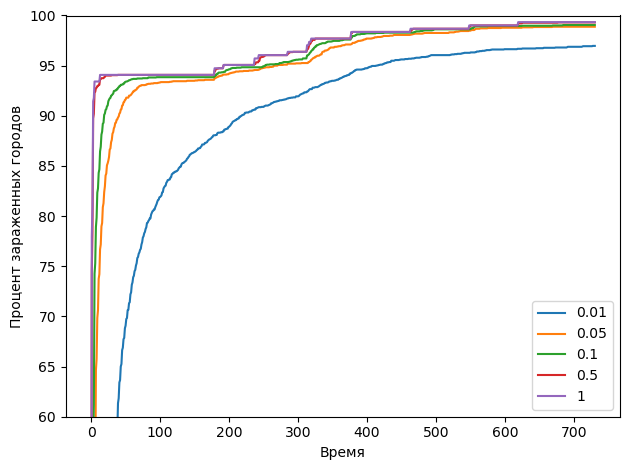

In [125]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
t = range(len(contagiousness_0_01))

ax.plot(t, contagiousness_0_01)
ax.plot(t, contagiousness_0_05)
ax.plot(t, contagiousness_0_1)
ax.plot(t, contagiousness_0_5)
ax.plot(t, contagiousness_1)

ax.set_xlabel('Время')
ax.set_ylabel('Процент зараженных городов')
ax.legend(labels=['0.01', '0.05', '0.1', '0.5', '1'])
ax.set_ylim([60, 100])
fig.tight_layout()  
plt.show()

# Создание графа

In [93]:
import networkx as nx

In [94]:
G = nx.Graph()

In [96]:
G.add_nodes_from(data['Dest'].unique())

Соберем данные для генерации взвешенного графа.

In [119]:
from collections import Counter

list_edges = Counter([(flight.Origin, flight.Dest) for flight in data.itertuples()])
sum_flights = sum(list_edges.values())
weighted_edges = []

for pair in list_edges:
    flag = True
    for row in weighted_edges:
        if (row[1], row[0]) == (pair[0], pair[1]):
            flag = False
            continue
    if flag:
        weighted_edges.append((pair[0], pair[1],
                           (list_edges.get((pair[0], pair[1]), 0)
                           + list_edges.get((pair[1], pair[0]), 0))/sum_flights))    

In [120]:
G.add_weighted_edges_from(weighted_edges)

In [173]:
nx.is_weighted(G)

True

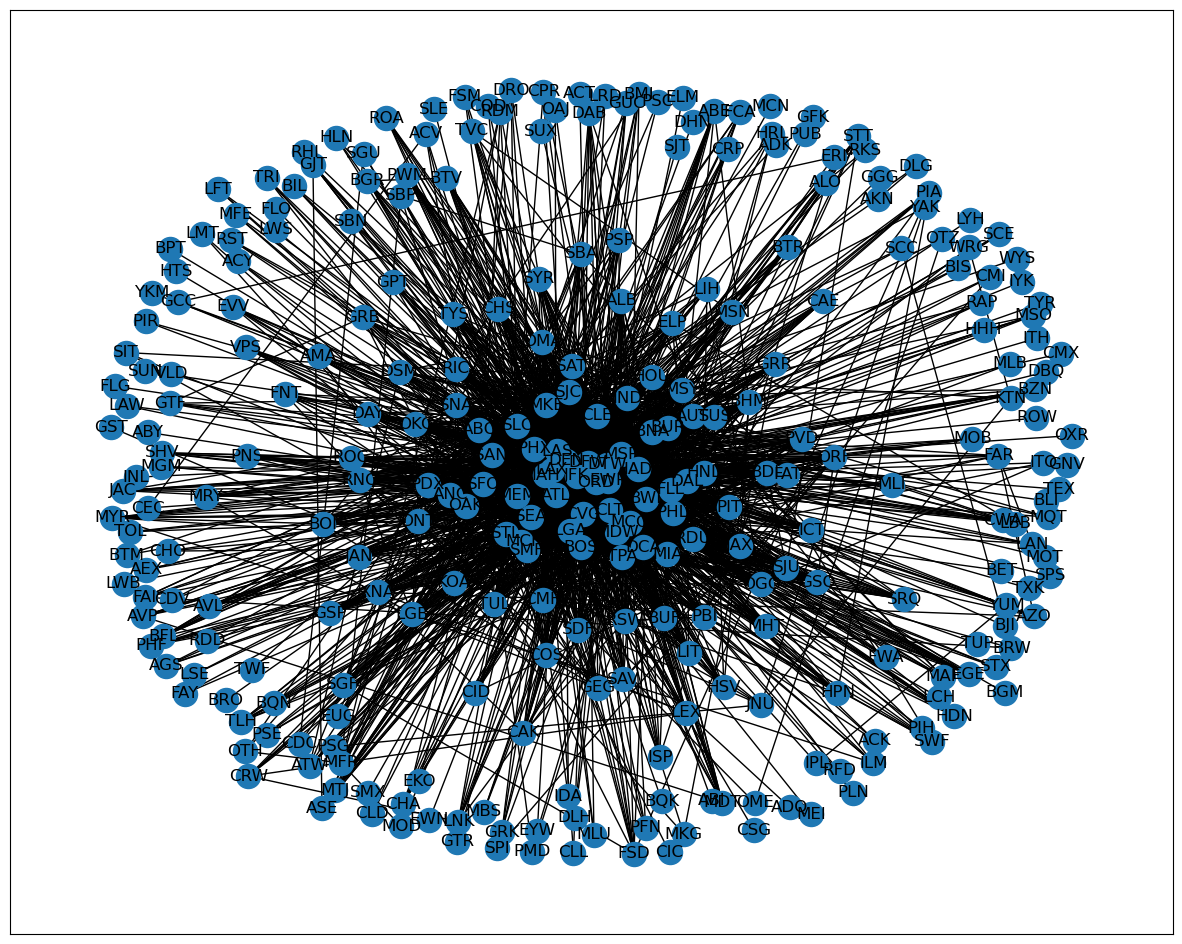

In [153]:
plt.figure(figsize=(15, 12))
nx.draw_networkx(G)

Посчитаем метрики полученного графа.

In [162]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

{'BWI': 0.0037648461787688934,
 'MCI': 0.002106579138284565,
 'JFK': 0.012685303676473907,
 'FLL': 0.005175660978530044,
 'CHS': 8.57190823046929e-05,
 'TPA': 0.004259439304189435,
 'SAT': 0.0017859606223374113,
 'IAD': 0.007405912333601446,
 'SAN': 0.0033339875940476783,
 'PHL': 0.002234856901253734,
 'ATL': 0.20517914327490663,
 'CLT': 0.01528307741557051,
 'PHX': 0.03142138854858835,
 'CLE': 0.005068263653099116,
 'MSP': 0.10495293820649698,
 'JAX': 0.0022719236300782638,
 'BOS': 0.006895485270996068,
 'LAX': 0.05081452263758008,
 'PBI': 0.00041244183363902553,
 'DTW': 0.06384806229094007,
 'PIT': 0.002374434258879329,
 'MHT': 3.837172139016569e-06,
 'SFO': 0.04400265143023317,
 'BDL': 0.0004010886028815713,
 'EWR': 0.015514618409955685,
 'PDX': 0.00899361756900108,
 'ORD': 0.08804062433722842,
 'SMF': 0.004742499305001166,
 'DFW': 0.10631375167168478,
 'CVG': 0.039448937899827445,
 'OAK': 0.0007687198691590247,
 'GSO': 2.635992872182702e-06,
 'SEA': 0.037937294935374594,
 'SJU': 8.

In [209]:
degree = dict(nx.degree(G))
degree

{'BWI': 65,
 'MCI': 52,
 'JFK': 72,
 'FLL': 58,
 'CHS': 18,
 'TPA': 63,
 'SAT': 41,
 'IAD': 71,
 'SAN': 55,
 'PHL': 59,
 'ATL': 173,
 'CLT': 82,
 'PHX': 88,
 'CLE': 76,
 'MSP': 126,
 'JAX': 40,
 'BOS': 67,
 'LAX': 89,
 'PBI': 28,
 'DTW': 119,
 'PIT': 36,
 'MHT': 18,
 'SFO': 70,
 'BDL': 35,
 'EWR': 91,
 'PDX': 44,
 'ORD': 150,
 'SMF': 37,
 'DFW': 134,
 'CVG': 113,
 'OAK': 33,
 'GSO': 19,
 'SEA': 56,
 'SJU': 23,
 'ONT': 33,
 'OKC': 31,
 'IAH': 114,
 'MFE': 3,
 'BNA': 51,
 'BQN': 3,
 'MFR': 11,
 'SWF': 8,
 'ALB': 18,
 'AUS': 53,
 'SLC': 111,
 'PSE': 4,
 'TUS': 32,
 'HNL': 24,
 'EUG': 7,
 'MCO': 90,
 'LIH': 10,
 'OGG': 18,
 'ITO': 3,
 'KOA': 13,
 'MIA': 49,
 'MEM': 79,
 'DEN': 122,
 'ANC': 29,
 'OMA': 27,
 'FAI': 6,
 'LGA': 66,
 'LAS': 91,
 'SJC': 28,
 'STL': 51,
 'DCA': 56,
 'LGB': 20,
 'RSW': 35,
 'LIT': 21,
 'SYR': 15,
 'SDF': 29,
 'MSY': 41,
 'GEG': 17,
 'RDU': 45,
 'SNA': 26,
 'GRB': 12,
 'PVD': 22,
 'MDW': 54,
 'COS': 22,
 'BUR': 16,
 'GSP': 13,
 'SRQ': 16,
 'KTN': 4,
 'TUL': 30,
 'C

In [198]:
clustering = nx.clustering(G)
clustering

{'BWI': 0.5399038461538461,
 'MCI': 0.6334841628959276,
 'JFK': 0.41784037558685444,
 'FLL': 0.5384150030248034,
 'CHS': 0.8888888888888888,
 'TPA': 0.5376344086021505,
 'SAT': 0.7292682926829268,
 'IAD': 0.44989939637826964,
 'SAN': 0.5764309764309764,
 'PHL': 0.6288720046756283,
 'ATL': 0.13899717703992473,
 'CLT': 0.4052996085516411,
 'PHX': 0.3709508881922675,
 'CLE': 0.4750877192982456,
 'MSP': 0.21193650793650792,
 'JAX': 0.75,
 'BOS': 0.5074626865671642,
 'LAX': 0.3388661899897855,
 'PBI': 0.7962962962962963,
 'DTW': 0.23629112662013957,
 'PIT': 0.7984126984126985,
 'MHT': 0.9673202614379085,
 'SFO': 0.34824016563147,
 'BDL': 0.8336134453781513,
 'EWR': 0.3540903540903541,
 'PDX': 0.5539112050739958,
 'ORD': 0.17825503355704697,
 'SMF': 0.5915915915915916,
 'DFW': 0.20132420603748177,
 'CVG': 0.25695322376738305,
 'OAK': 0.6723484848484849,
 'GSO': 0.9766081871345029,
 'SEA': 0.5324675324675324,
 'SJU': 0.924901185770751,
 'ONT': 0.6515151515151515,
 'OKC': 0.7806451612903226,
 

In [164]:
print(G)

Graph with 303 nodes and 2683 edges


# Получение медианного времени заражения для каждого города

In [126]:
import json
with open('results_0.5_50.json', 'r') as file:
    results_50 = json.load(file)

In [141]:
from statistics import median

def median_time(dictionary):
    median_time_list = dict()
    for attempt in dictionary.keys():
        for time, city in dictionary[attempt].items():
            time = pd.to_datetime(time)
            if median_time_list.get(city, None) is None:
                median_time_list[city] = [time - pd.to_datetime('2008-01-01 00:00:00')]
            else:
                median_time_list[city].append(time - pd.to_datetime('2008-01-01 00:00:00'))
    for key, value in median_time_list.items():
        median_time_list[key] = median(value)
    return median_time_list

In [194]:
median_time_results = median_time(results_50)

In [195]:
resulting_data = pd.DataFrame.from_dict(median_time_results,
                                        orient='index', columns=['median_time'])
resulting_data.head()

,median_time
ABE,0 days 00:00:00
RDU,0 days 02:01:00
SBA,0 days 07:52:00
CID,0 days 11:59:00
EVV,0 days 11:35:00


In [210]:
df_1 = pd.DataFrame.from_dict(betweenness_centrality,
                              orient='index', columns=['betweenness_centrality'])
df_2 = pd.DataFrame.from_dict(degree,
                              orient='index', columns=['degree'])
df_3 = pd.DataFrame.from_dict(clustering,
                              orient='index', columns=['clustering'])
resulting_data = pd.concat([resulting_data, df_1, df_2, df_3], axis=1)
resulting_data.head()

,median_time,betweenness_centrality,degree,clustering
ABE,0 days 00:00:00,0.000114,11,0.836364
RDU,0 days 02:01:00,0.001018,45,0.786869
SBA,0 days 07:52:00,0.000165,12,0.803030
CID,0 days 11:59:00,0.000009,11,0.927273
EVV,0 days 11:35:00,0.000000,7,1.000000


In [243]:
def to_sec(value):
    return value.seconds

resulting_data['median_time'] = resulting_data['median_time'].apply(lambda x: to_sec(x))

In [250]:
resulting_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, ABE to PUB
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   median_time             302 non-null    float64
 1   betweenness_centrality  303 non-null    float64
 2   degree                  303 non-null    int64  
 3   clustering              303 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 19.9+ KB


# Отображение и интерпретация результатов

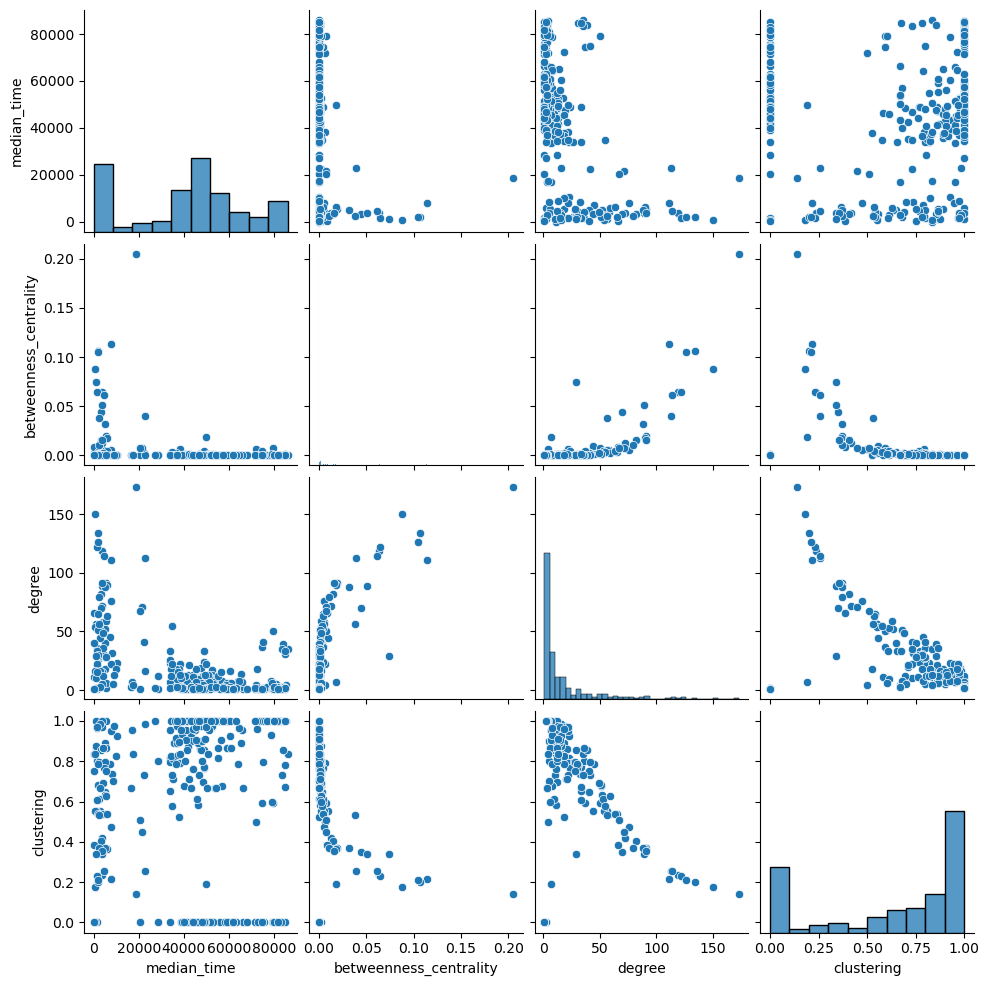

In [256]:
import seaborn as sns
sns.pairplot(data=resulting_data);

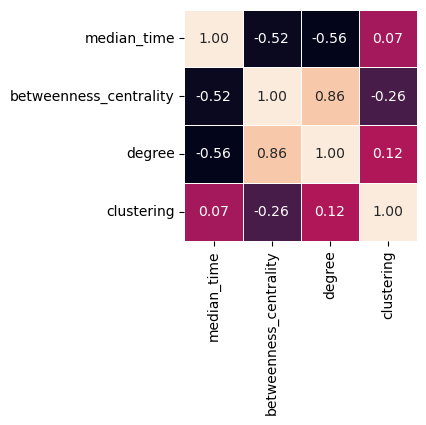

In [257]:
plt.figure(figsize=(3, 3))
sns.heatmap(resulting_data.corr(method='spearman'), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

Наблюдаем заметную отрицательную корреляцию betweenness_centrality и degree с median_time. Это легко обяснить, если учесть что оба показателя (betweenness_centrality и degree) напрямую отражают количество связей с другими нодами.

betweenness_centrality показывает насколько часто рассматриваемая вершина является «перевалочным пунктом» при переходах от одной вершины графа до любой другой. А degree - это количество ребер, примыкающих к узлу.

В то же время, чем больше связей у аэропорта, тем выше шанс заразиться и тем меньше время до заражения.